In [1]:
## Perform k-means clustering on participation coeffs values

#load in libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [2]:
#load in relevant data - 
#setwd
os.chdir("/Users/ntaylor/Library/CloudStorage/OneDrive-TheUniversityofSydney(Staff)/Postdoc_Rob/Analysis/Graph_Theory/schaef_400")
#pc_df = pd.read_csv('reorder_pc_all.csv')

data = np.genfromtxt('reorder_pc_all.csv', delimiter=',', skip_header=0)

In [3]:
#reshape data into 119 x 210 x 502
reshaped_data = data.reshape(119, 210, 502)


In [4]:
# reshaped data to be stacked over time
reshaped_data2 = reshaped_data.reshape(-1, 502)

In [5]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=4, random_state=0).fit(reshaped_data2)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Library/Frameworks/Python.framework/Versions/3.12/lib/p

In [6]:
state_assignments = kmeans.fit_predict(reshaped_data2)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Library/Frameworks/Python.framework/Versions/3.12/lib/p

In [7]:
state_assignments = state_assignments.reshape(119, 210)

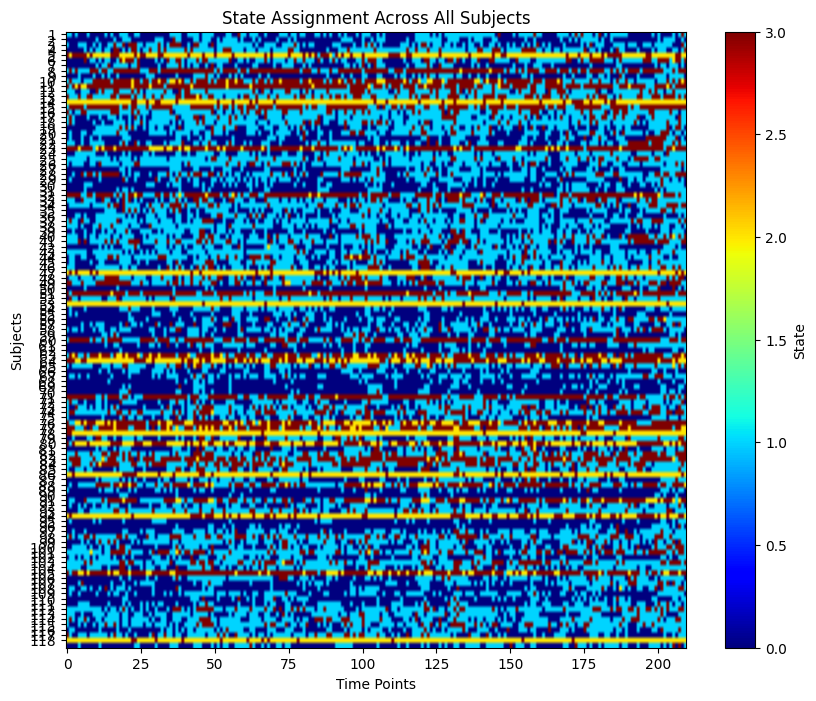

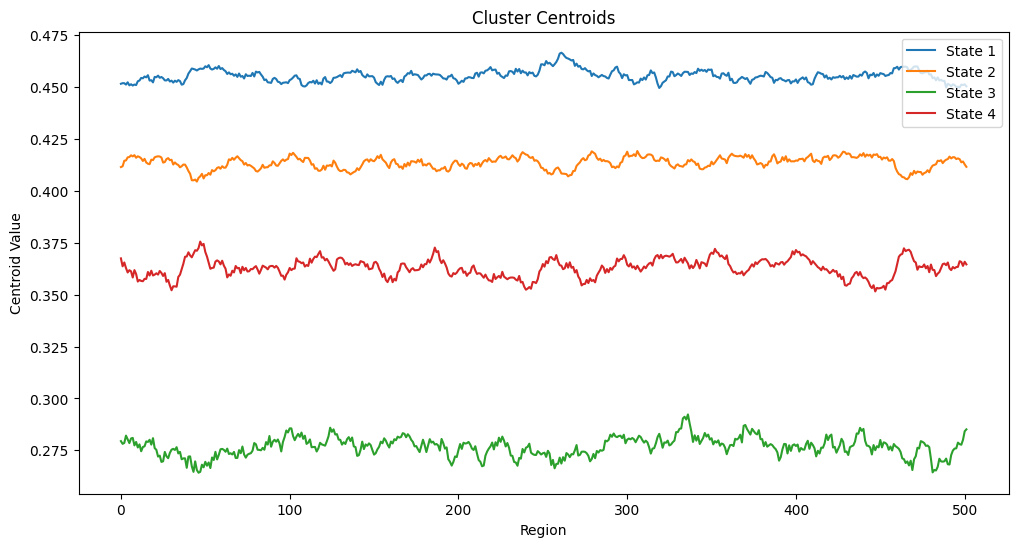

In [8]:
# Plot state assignments for all subjects
plt.figure(figsize=(10, 8))
plt.imshow(state_assignments, aspect='auto', cmap='jet')
plt.colorbar(label='State')
plt.title('State Assignment Across All Subjects')
plt.xlabel('Time Points')
plt.ylabel('Subjects')
plt.yticks(np.arange(118), labels=np.arange(1, 118 + 1))
plt.show()

# Optional: Plot the cluster centroids
centroids = kmeans.cluster_centers_
plt.figure(figsize=(12, 6))
for i in range(4):
    plt.plot(centroids[i], label=f'State {i+1}')
plt.title('Cluster Centroids')
plt.xlabel('Region')
plt.ylabel('Centroid Value')
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Library/Frameworks/Python.framework/Versions/3.12/lib/p

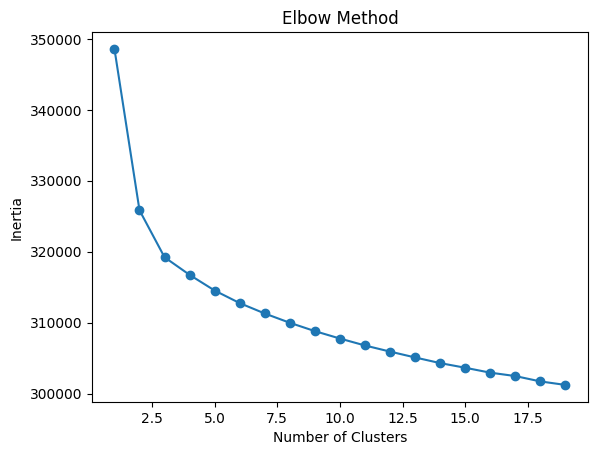

In [9]:
# Attempt to evaluate the appropriate number of clusters - Elbow point method
# Range of possible cluster numbers
range_n_clusters = range(1, 20)

# List to hold inertia values
inertia_values = []

# Compute K-means clustering for each number of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    kmeans.fit(reshaped_data2)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(range_n_clusters, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Run the clustering on just the 400 schaefer cortical regions

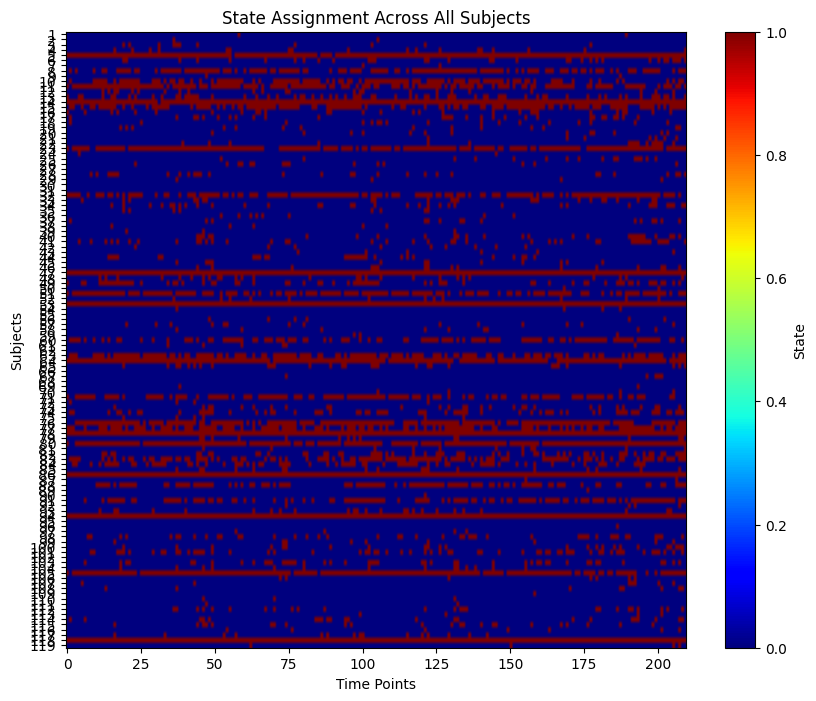

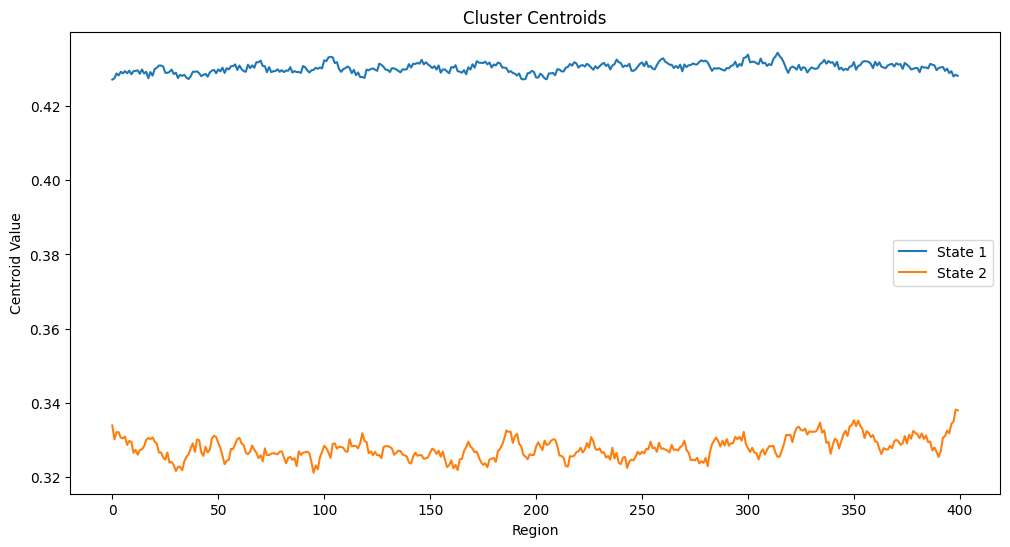

In [11]:
#just do clustering on 400 schaefer region
reshaped_data3 = reshaped_data[:, :, 0:400]
# reshaped data to be stacked over time
reshaped_data4 = reshaped_data3.reshape(-1, 400)
# Perform k-means clustering - number of cluster = 3 (based on elbow method)
k=2
kmeans = KMeans(n_clusters=k, random_state=0).fit(reshaped_data4)

state_assignments = kmeans.fit_predict(reshaped_data4)

state_assignments = state_assignments.reshape(119, 210)

#plot this out
# Plot state assignments for all subjects
plt.figure(figsize=(10, 8))
plt.imshow(state_assignments, aspect='auto', cmap='jet')
plt.colorbar(label='State')
plt.title('State Assignment Across All Subjects')
plt.xlabel('Time Points')
plt.ylabel('Subjects')
plt.yticks(np.arange(119), labels=np.arange(1, 119 + 1))
plt.show()

# Optional: Plot the cluster centroids
centroids = kmeans.cluster_centers_
plt.figure(figsize=(12, 6))
for i in range(k):
    plt.plot(centroids[i], label=f'State {i+1}')
plt.title('Cluster Centroids')
plt.xlabel('Region')
plt.ylabel('Centroid Value')
plt.legend()
plt.show()

Clustering of the states between the delirium and healthy participants

In [13]:
# look at the clustering of the states between the groups
# Load in the data
clinic_data = pd.read_csv("/Users/ntaylor/Library/CloudStorage/OneDrive-TheUniversityofSydney(Staff)/Postdoc_Rob/Analysis/Demographic_Data/subject_data_IL810_mri.csv")
# Remove the entire row with index 87
clinic_data = clinic_data.drop(index=87)
# Delirium Group
del_indices = clinic_data[clinic_data['bin_delirium'] == 1].index
del_indices_list = del_indices.tolist()
print(del_indices_list)

# No Delirium Group
health_indices = clinic_data[clinic_data['bin_delirium'] == 0].index
health_indices_list = health_indices.tolist()

[1, 4, 11, 13, 14, 19, 20, 24, 26, 29, 32, 35, 38, 40, 45, 47, 48, 60, 68, 70, 74, 76, 77, 78, 80, 82, 84, 93, 102, 105, 118]


In [14]:
#Clusters for the delirium group
# Extract the 'state_assignment' column
state_assignment_del = state_assignments[del_indices_list,:]
state_assignment_health = state_assignments[np.array(health_indices_list) - 1,:]



Plotting each individual K-Means State across each subject

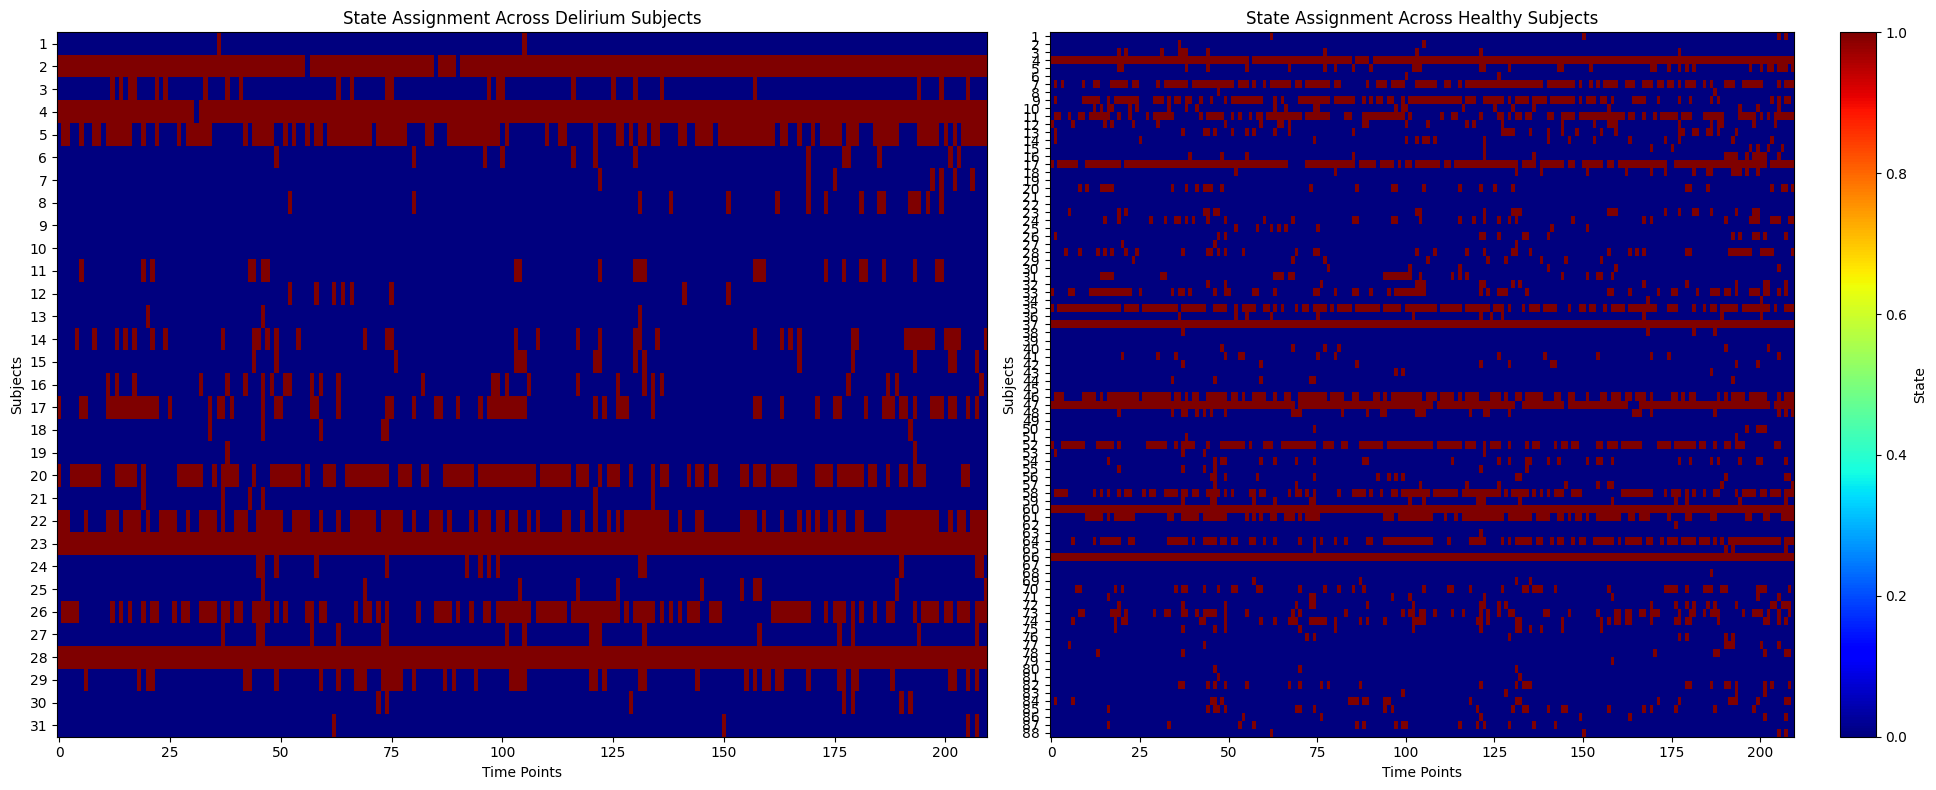

In [15]:
# Plot state assignments for all subjects
# Create subplots
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns

# Plot state assignments for delirium subjects
axes[0].imshow(state_assignment_del, aspect='auto', cmap='jet')
axes[0].set_title('State Assignment Across Delirium Subjects')
axes[0].set_xlabel('Time Points')
axes[0].set_ylabel('Subjects')
axes[0].set_yticks(np.arange(31))
axes[0].set_yticklabels(np.arange(1, 31 + 1))
#axes[0].colorbar(label='State')

# Plot state assignments for healthy subjects
im = axes[1].imshow(state_assignment_health, aspect='auto', cmap='jet')
axes[1].set_title('State Assignment Across Healthy Subjects')
axes[1].set_xlabel('Time Points')
axes[1].set_ylabel('Subjects')
axes[1].set_yticks(np.arange(88))
axes[1].set_yticklabels(np.arange(1, 88 + 1))
fig.colorbar(im, ax=axes[1], label='State')

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
# Quantify the sum of states for each group
# Delirium group - divided by number of subjects
state_sum_del_zero = np.sum(state_assignment_del==0)/31
state_sum_del_one = np.sum(state_assignment_del==1)/31
state_sum_del_two = np.sum(state_assignment_del==2)/31
# Calculate deviations (standard deviation for simplicity)
deviation_del_zero = np.std(state_assignment_del == 0)
deviation_del_one = np.std(state_assignment_del == 1)
deviation_del_two = np.std(state_assignment_del == 2)

# Healthy group - divided by number of subjects
state_sum_health_zero = np.sum(state_assignment_health==0)/88
state_sum_health_one = np.sum(state_assignment_health==1)/88
state_sum_health_two = np.sum(state_assignment_health==2)/88

# Calculate deviations (standard deviation for simplicity)
deviation_health_zero = np.std(state_assignment_health == 0)
deviation_health_one = np.std(state_assignment_health == 1)
deviation_health_two = np.std(state_assignment_health == 2)


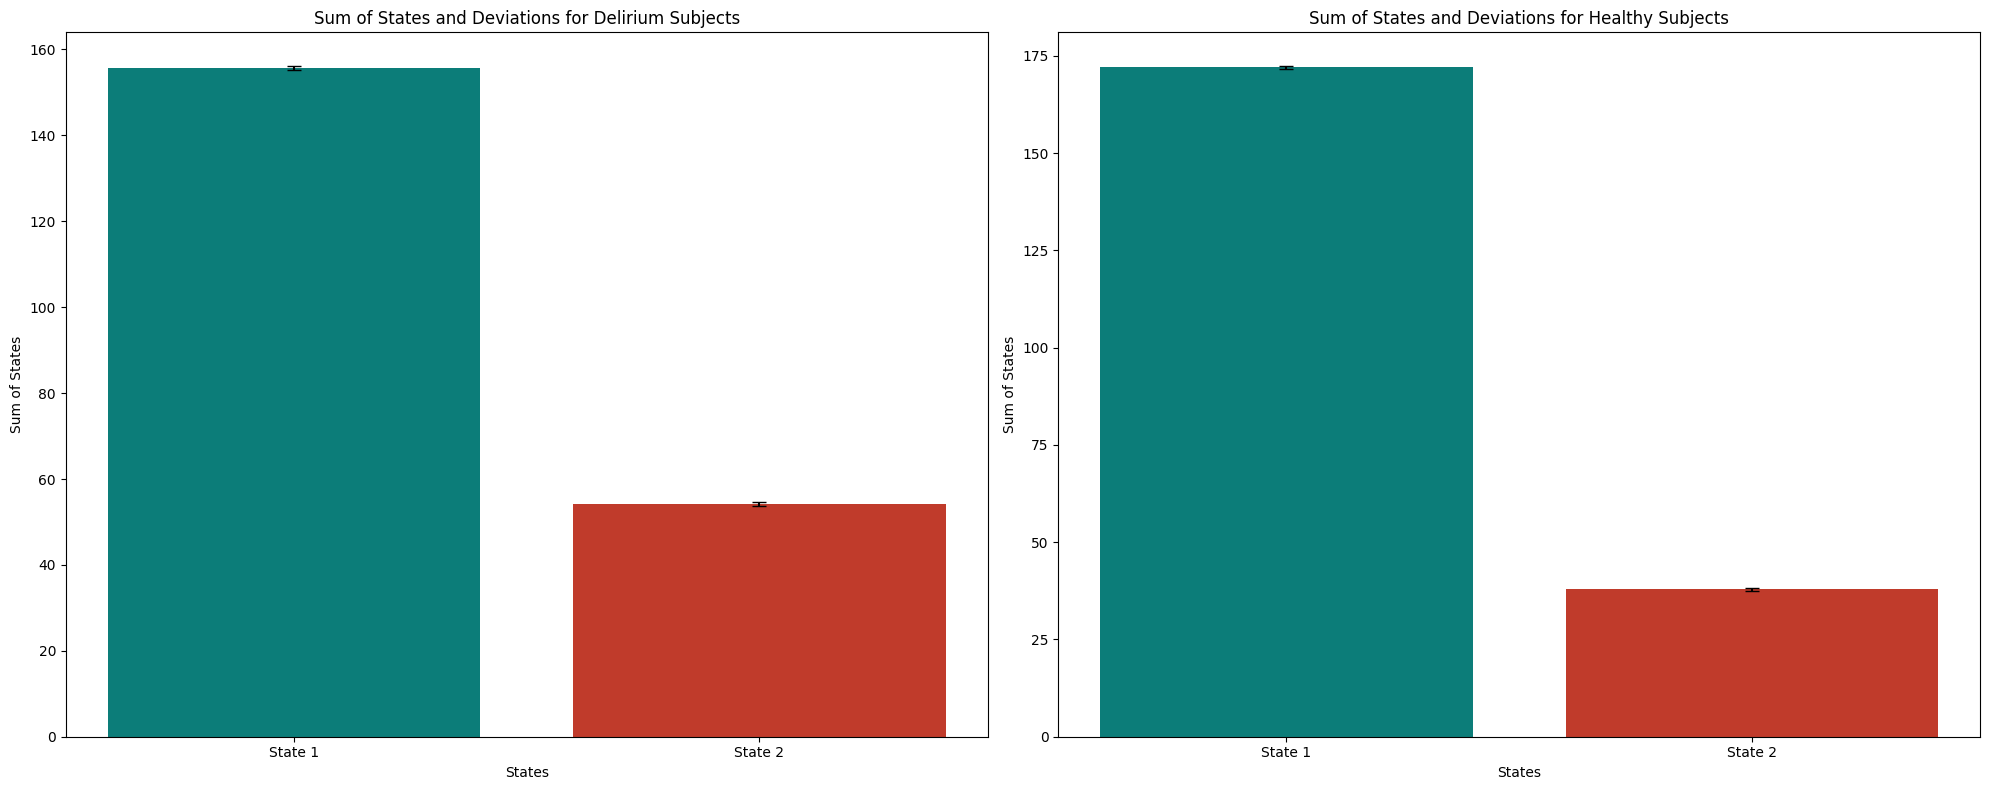

In [18]:
# create a bar plot of the sum of states for each group and deviation
# Data for plotting
#states = ['State 1', 'State 2', 'State 3']
#sums_del = [state_sum_del_zero, state_sum_del_one, state_sum_del_two]
#deviations_del = [deviation_del_zero, deviation_del_one, deviation_del_two]
#sums_health = [state_sum_health_zero, state_sum_health_one, state_sum_health_two]
#deviations_health = [deviation_health_zero, deviation_health_one, deviation_health_two]



states = ['State 1', 'State 2']
sums_del = [state_sum_del_zero, state_sum_del_one]
deviations_del = [deviation_del_zero, deviation_del_one]
sums_health = [state_sum_health_zero, state_sum_health_one]
deviations_health = [deviation_health_zero, deviation_health_one]

# Create bar plots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot for delirium subjects
#colors =['#5b3d85','#0084ad','#7db6a6']
colors =['#0C7D79','#C03B2B']

axes[0].bar(states, sums_del, yerr=deviations_del, capsize=5, color=colors)
axes[0].set_xlabel('States')
axes[0].set_ylabel('Sum of States')
axes[0].set_title('Sum of States and Deviations for Delirium Subjects')

# Plot for healthy subjects
axes[1].bar(states, sums_health, yerr=deviations_health, capsize=5, color=colors)
axes[1].set_xlabel('States')
axes[1].set_ylabel('Sum of States')
axes[1].set_title('Sum of States and Deviations for Healthy Subjects')

# Adjust layout
plt.tight_layout()
plt.show()

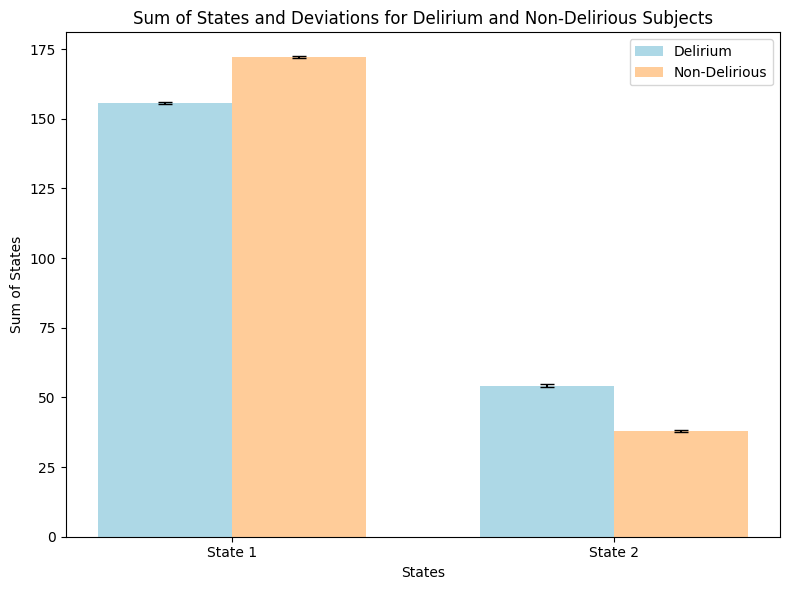

In [28]:
# Number of states
n_states = len(states)

# Positions of the bars on the x-axis
ind = np.arange(n_states)

# Width of a bar
width = 0.35

# Hex color values
#colors_del = ['#5b3d85','#5b3d85','#5b3d85']  # Example hex colors for delirium
colors_del = ['#add8e6', '#add8e6', '#add8e6']
colors_health = ['#ffcc99', '#ffcc99', '#ffcc99']  # Pastel orange for healthy

# Create bar plots
fig, ax = plt.subplots(figsize=(8, 6))

# Plot for delirium subjects
bars_del = ax.bar(ind - width/2, sums_del, width, yerr=deviations_del, capsize=5, color=colors_del, label='Delirium')

# Plot for healthy subjects
bars_health = ax.bar(ind + width/2, sums_health, width, yerr=deviations_health, capsize=5, color=colors_health, label='Non-Delirious')

# Add labels, title, and legend
ax.set_xlabel('States')
ax.set_ylabel('Sum of States')
ax.set_title('Sum of States and Deviations for Delirium and Non-Delirious Subjects')
ax.set_xticks(ind)
ax.set_xticklabels(states)
ax.legend()

# Adjust layout
plt.tight_layout()
#save plot
plt.savefig("/Users/ntaylor/Library/CloudStorage/OneDrive-TheUniversityofSydney(Staff)/Postdoc_Rob/Analysis/Graph_Theory/schaef_400/sum_of_states_grp_cluster.svg",format='svg')


#Show plot
plt.show()


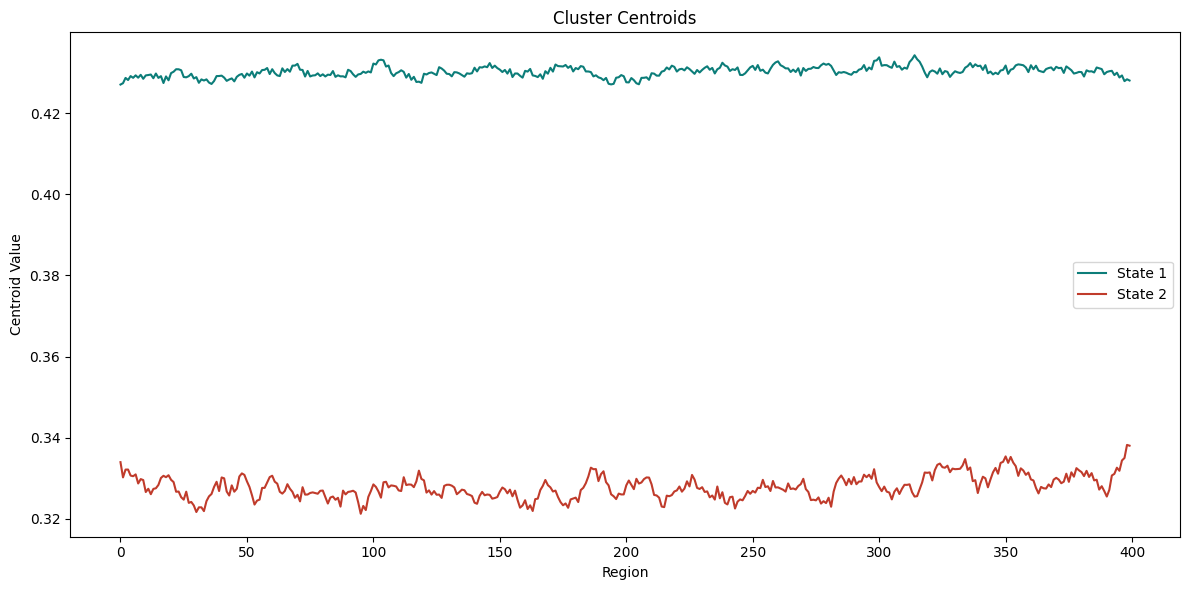

In [35]:
# Optional: Plot the cluster centroids
centroids = kmeans.cluster_centers_

# Get a color for each state

colors = ['#0C7D79','#C03B2B']

# Plot the cluster centroids
plt.figure(figsize=(12, 6))
for i in range(k):
    plt.plot(centroids[i], label=f'State {i+1}', color=colors[i])

# Add labels, title, and legend
plt.title('Cluster Centroids')
plt.xlabel('Region')
plt.ylabel('Centroid Value')
#plt.ylim(0, 0.45)  # Adjust the y-axis range
plt.legend()

# Adjust layout
plt.tight_layout()

# Save plot
plt.savefig("/Users/ntaylor/Library/CloudStorage/OneDrive-TheUniversityofSydney(Staff)/Postdoc_Rob/Analysis/Graph_Theory/schaef_400/cluster_centroids_pc.svg", format='svg')

# Show plot
plt.show()


Determine which regions are more in either state 1,2,3?

In [ ]:
# take the average PC value for each state
# Average PC values for each state

#data of all subjects x time x 400 regions
reshaped_data_4 

for i in range(400):
    

K-means clustering of the regions - which regions are clustering together in relation to being more integrated or segregated?

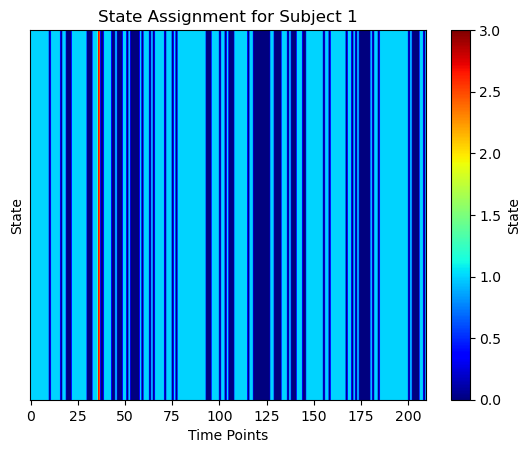

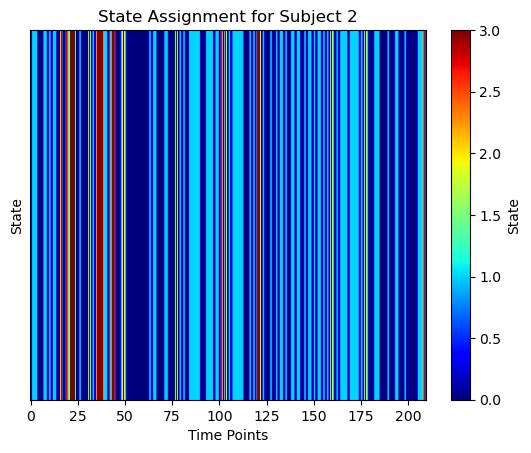

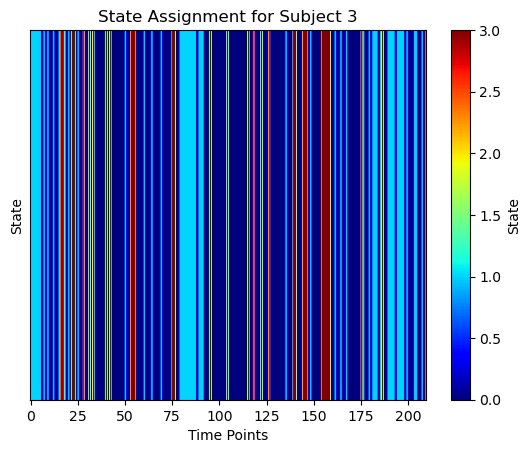

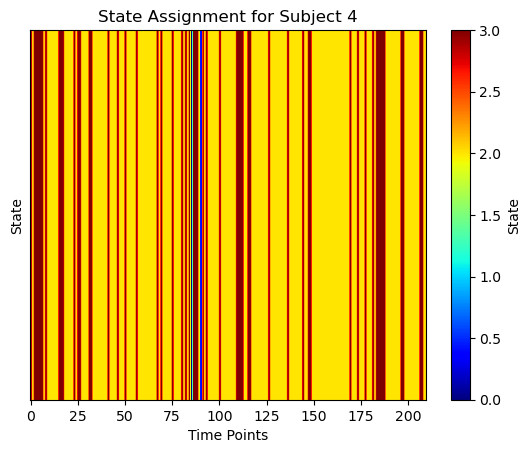

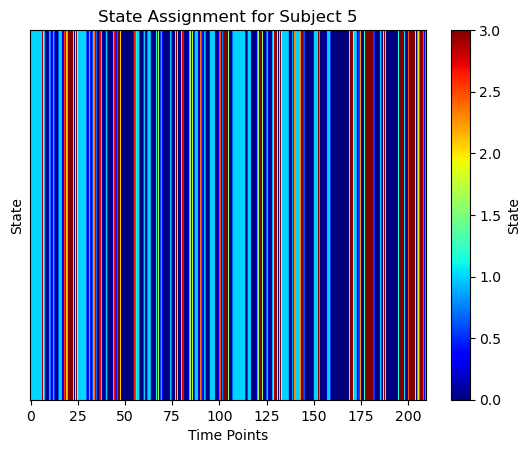

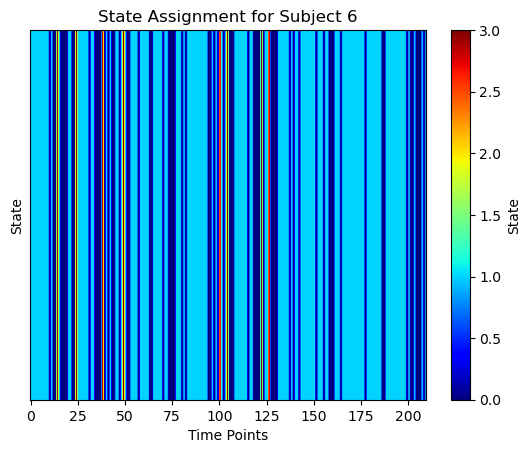

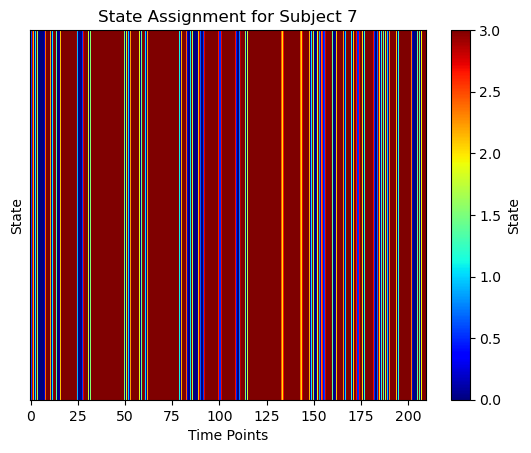

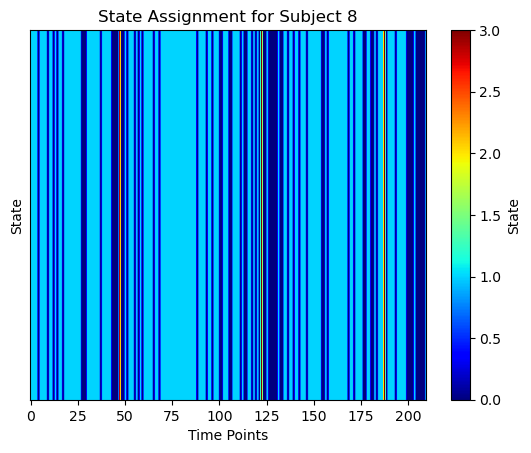

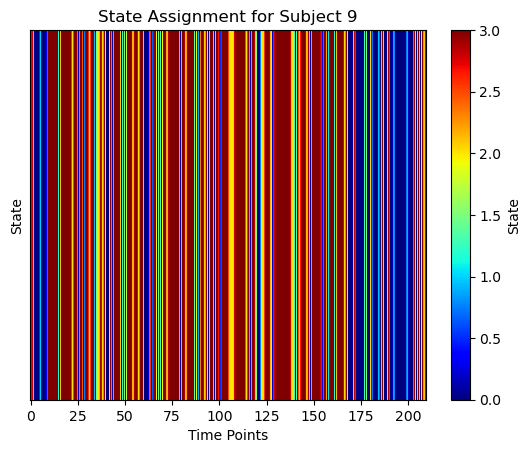

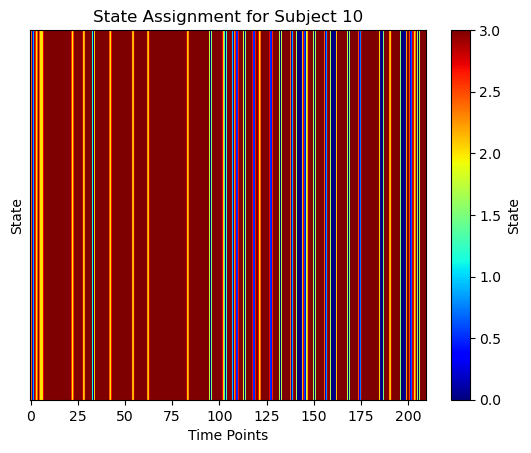

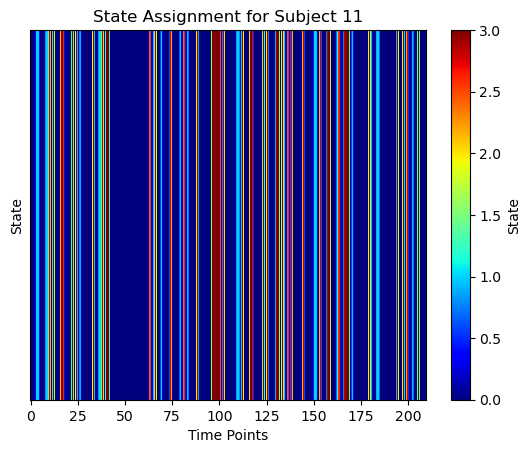

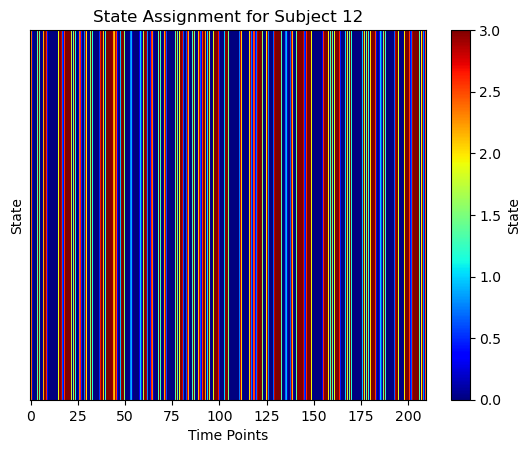

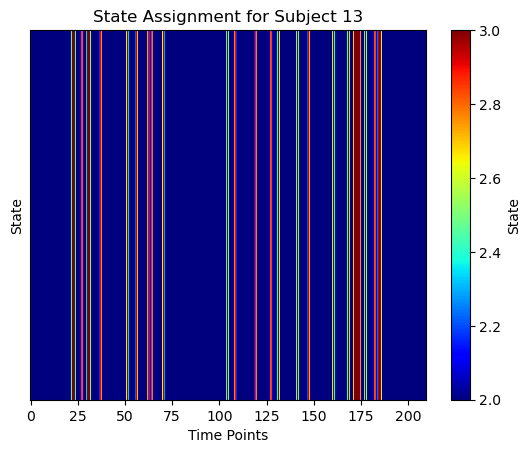

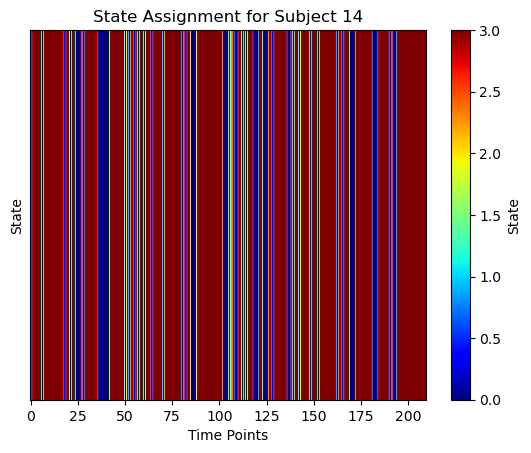

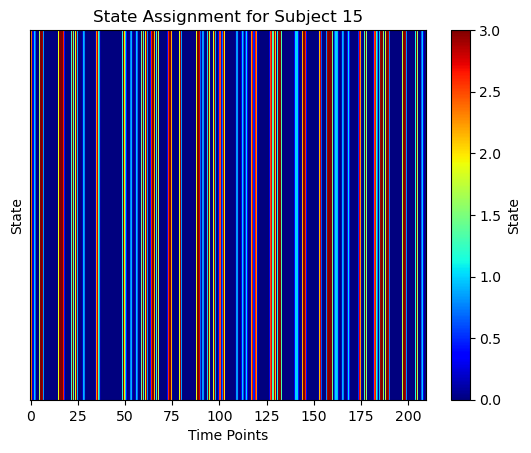

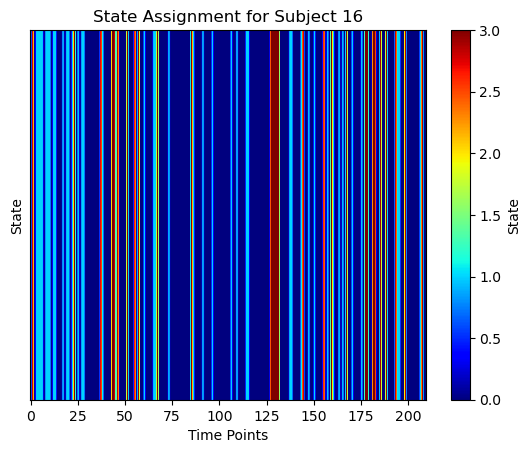

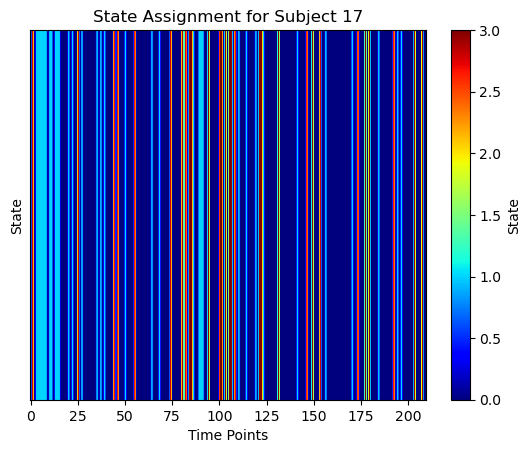

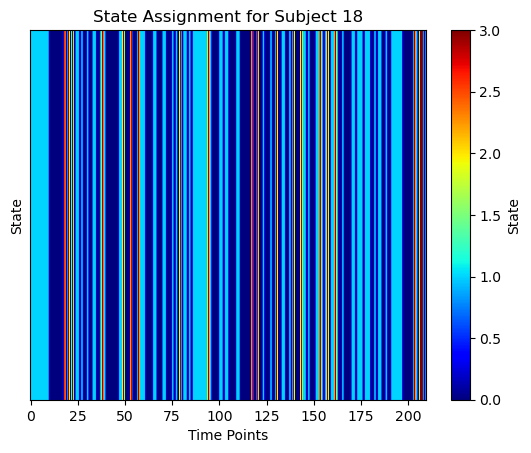

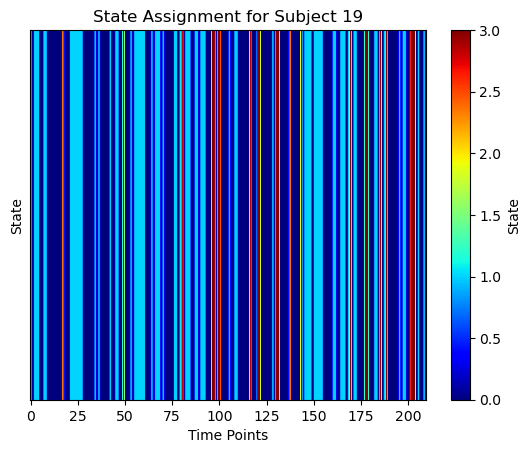

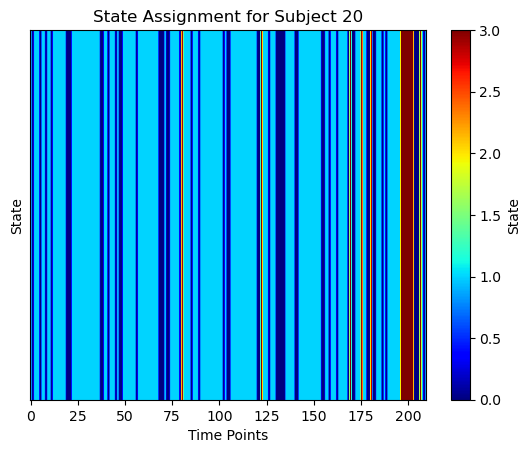

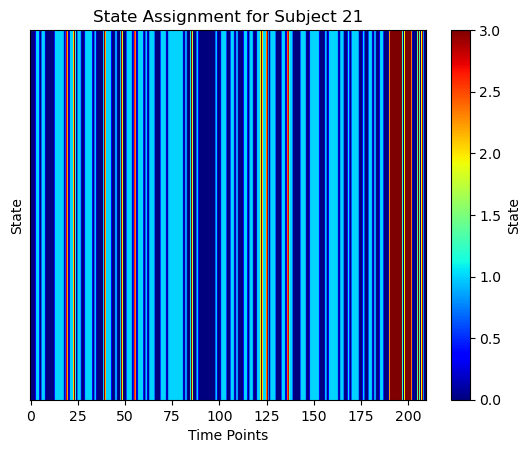

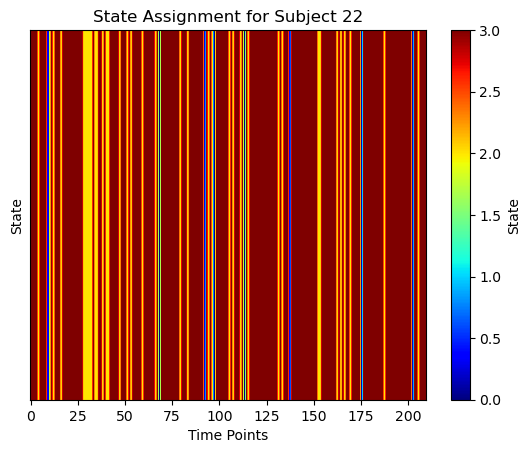

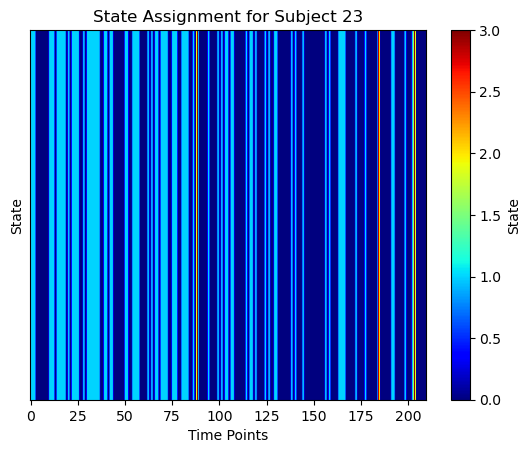

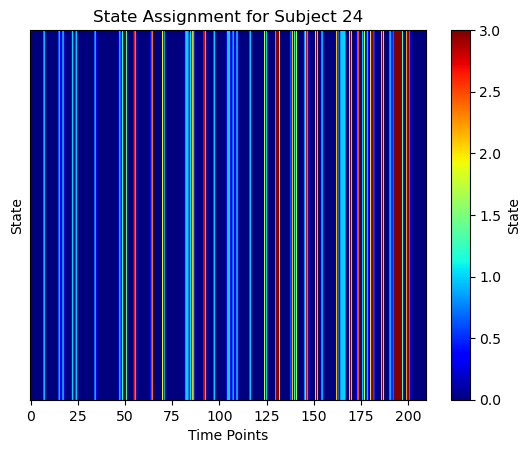

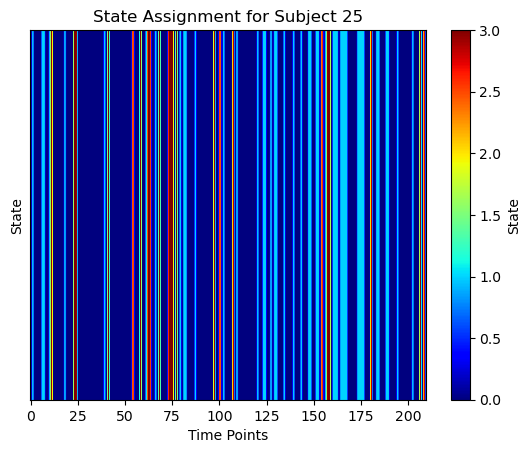

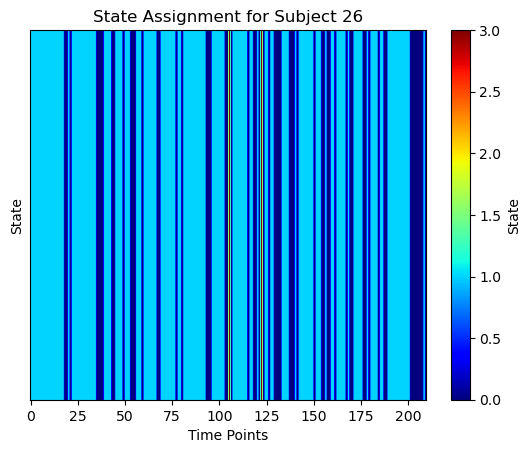

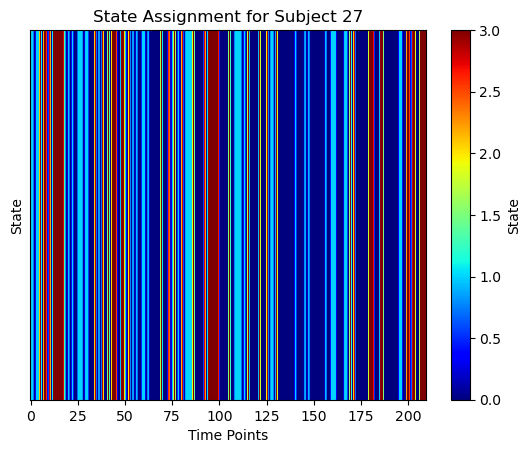

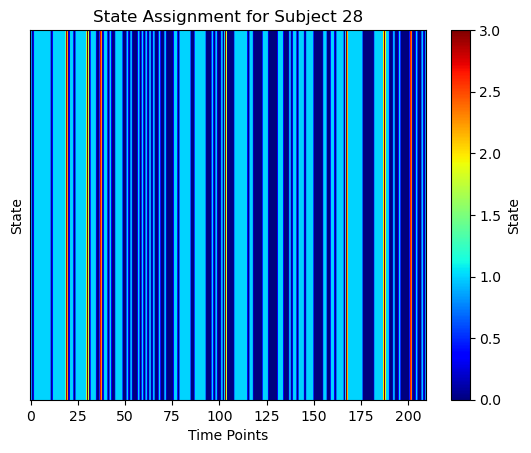

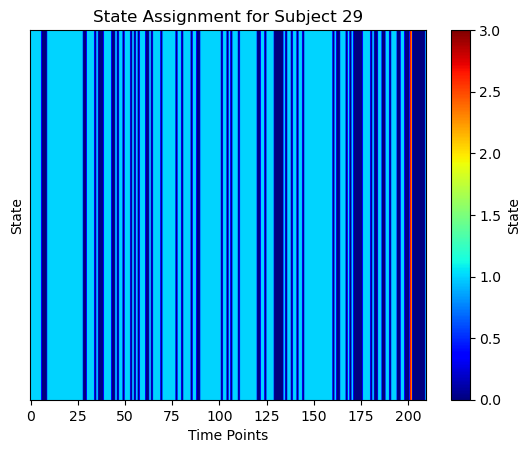

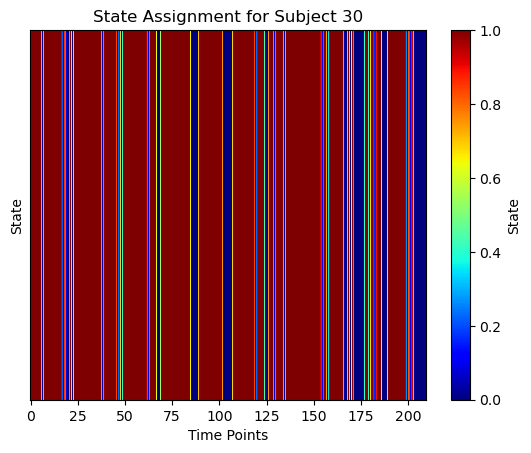

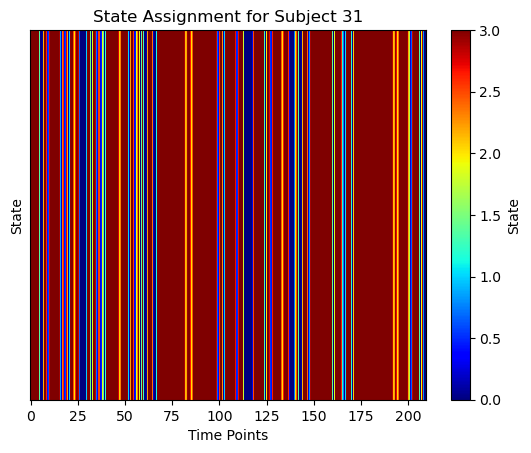

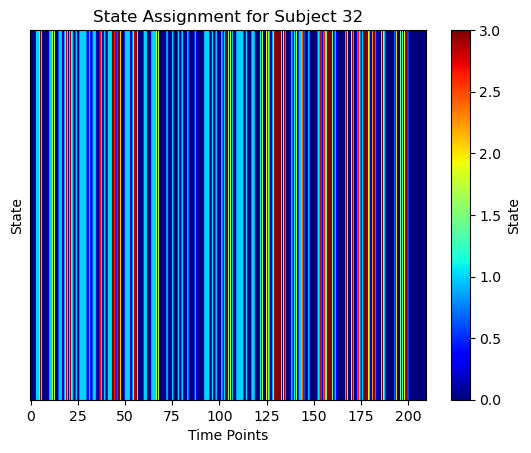

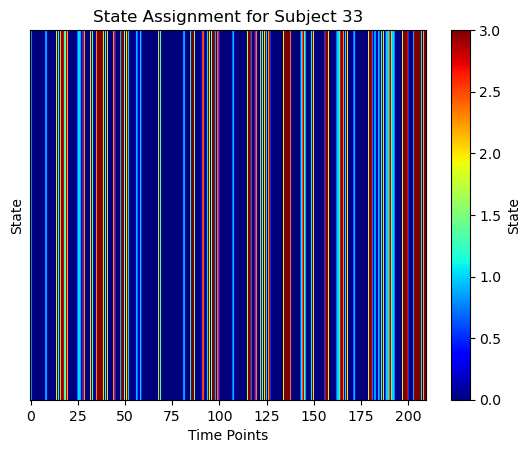

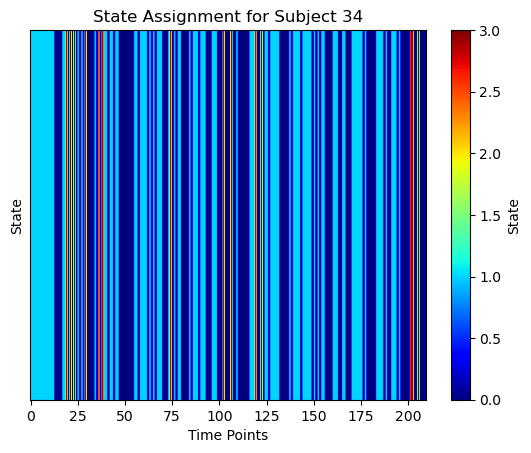

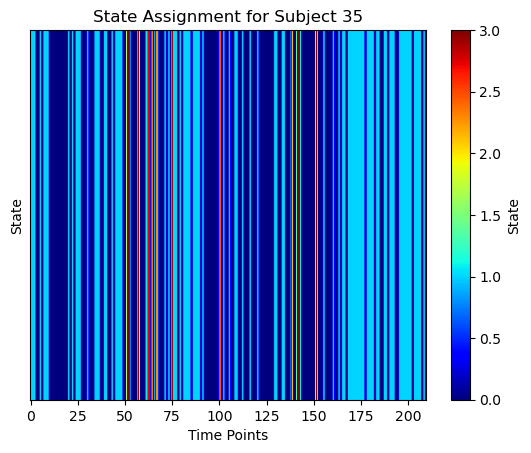

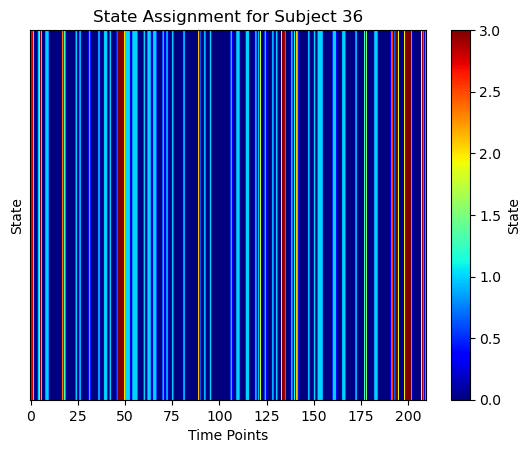

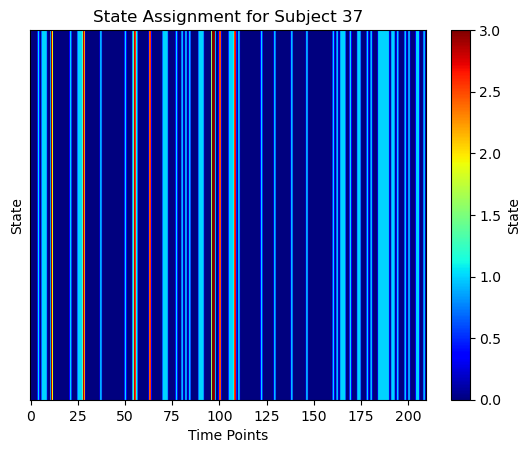

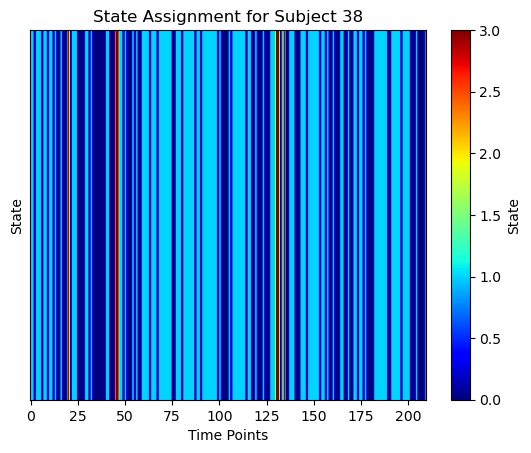

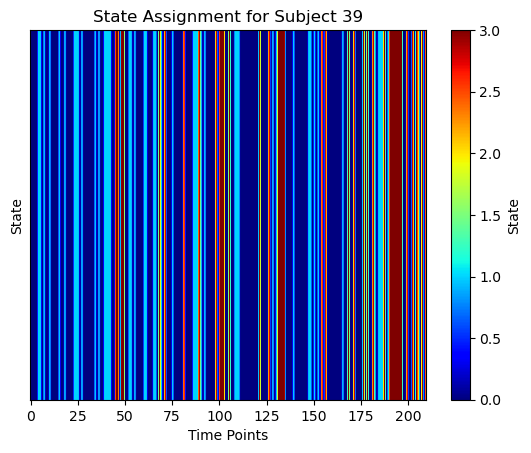

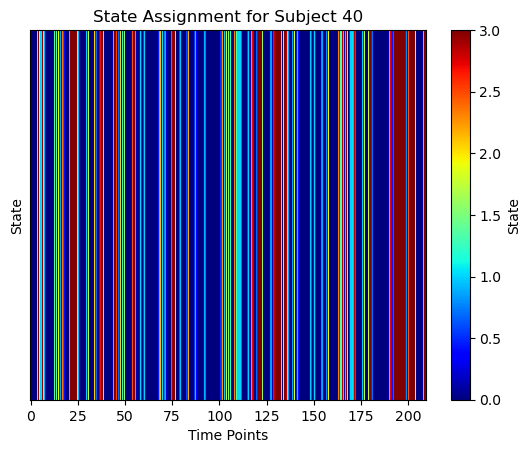

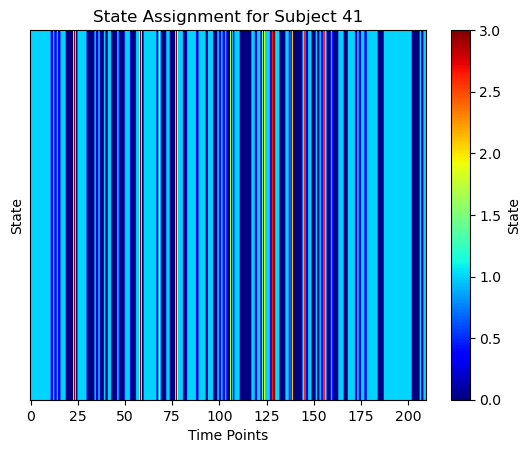

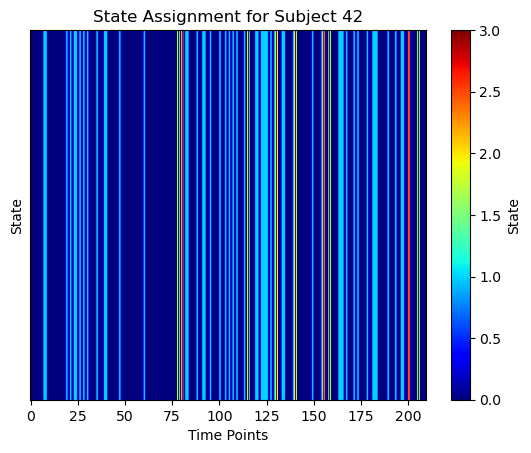

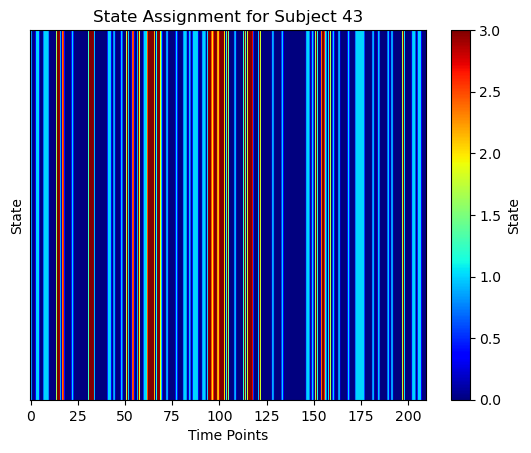

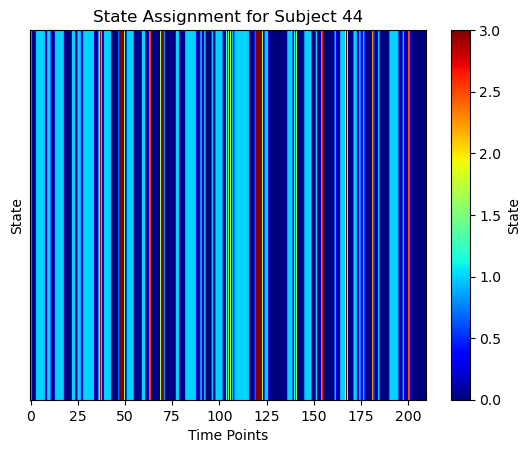

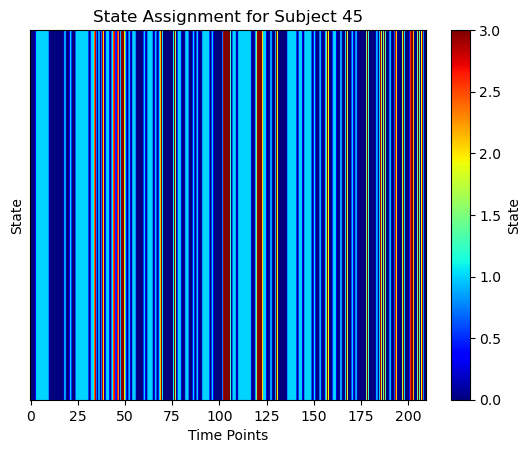

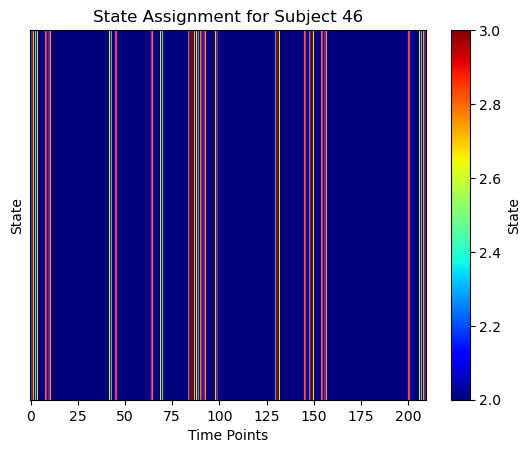

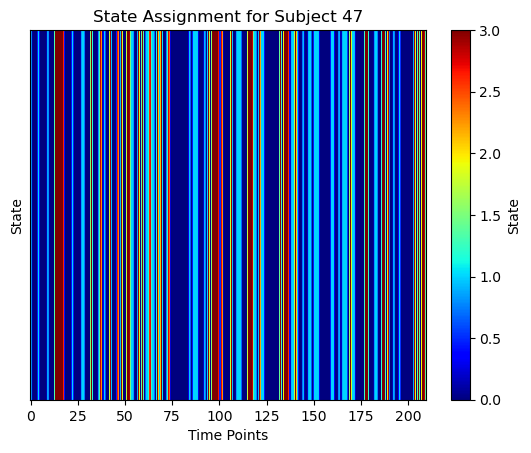

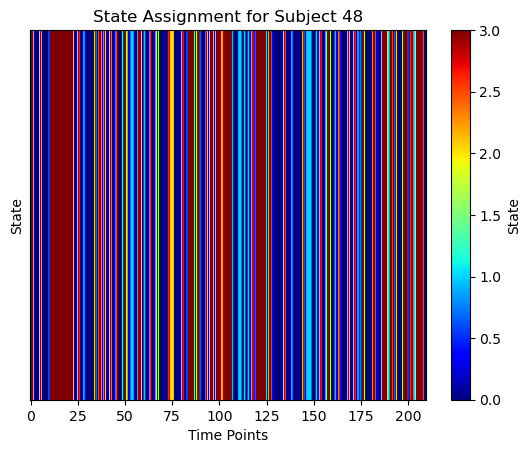

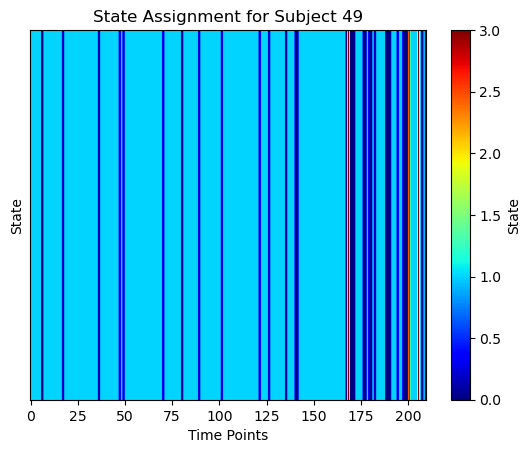

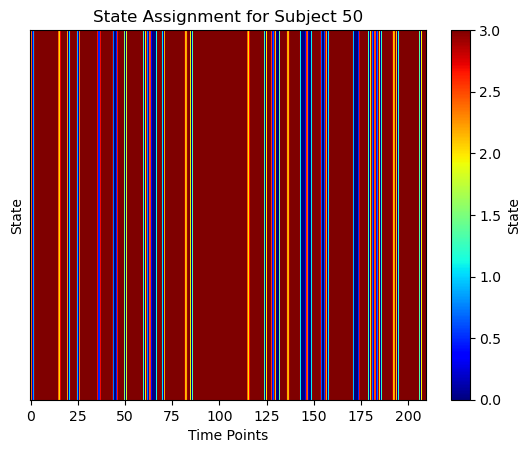

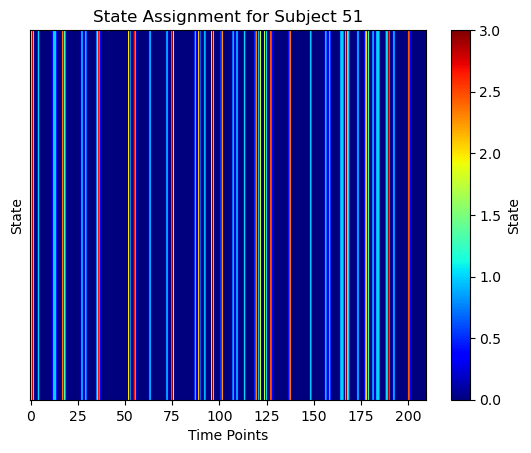

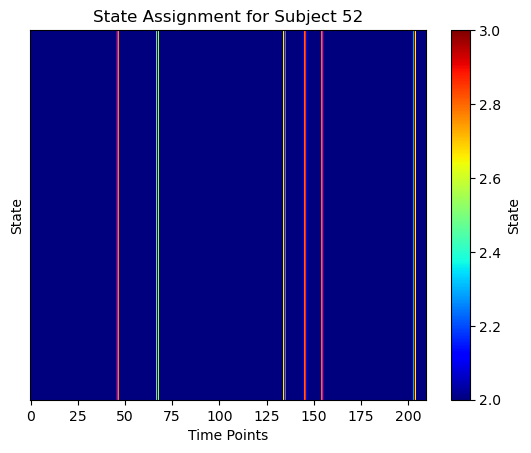

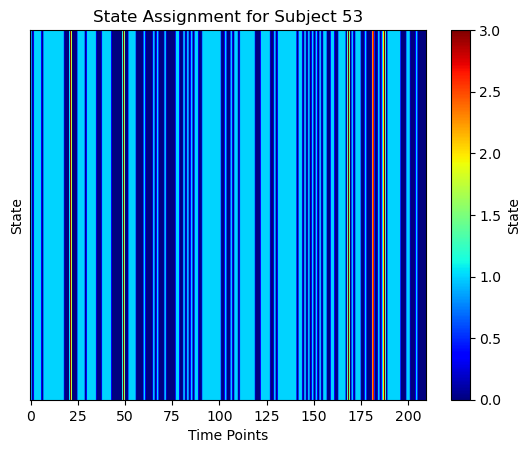

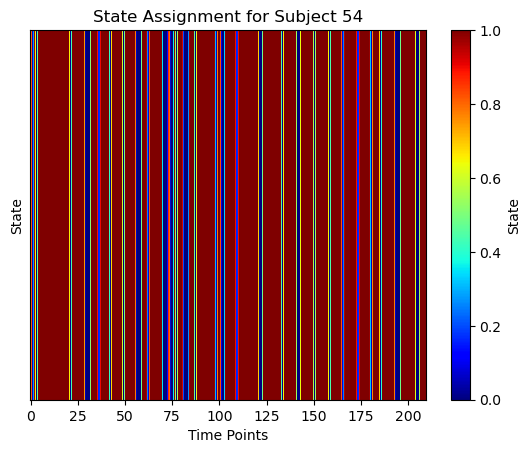

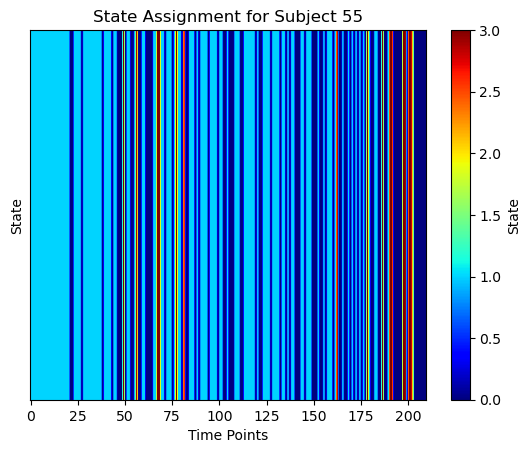

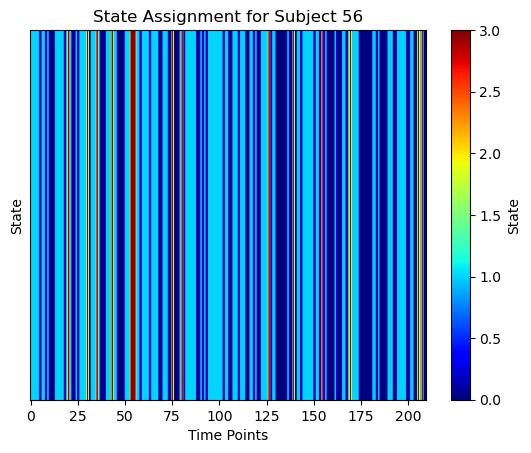

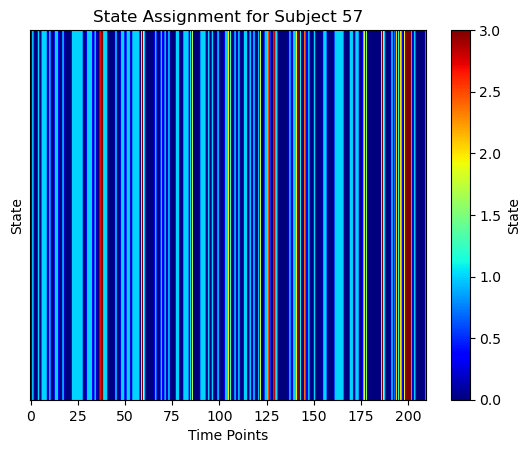

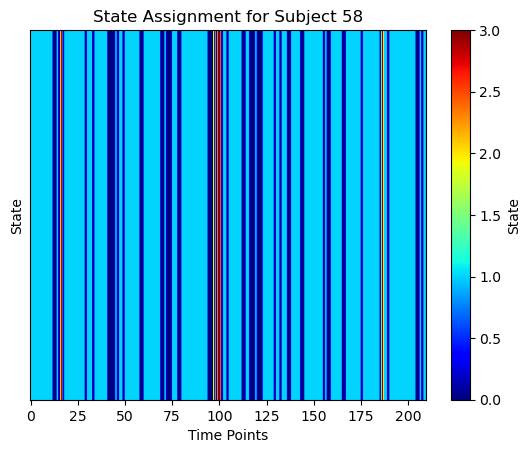

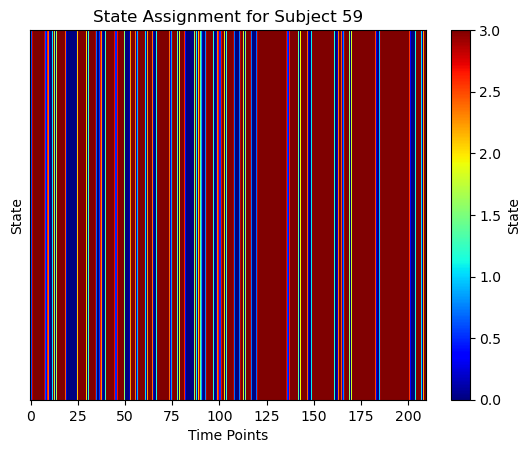

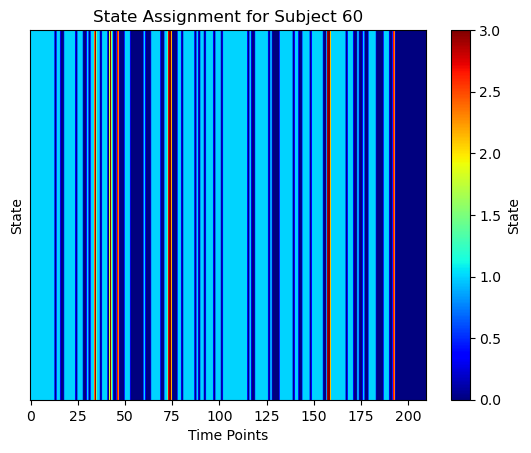

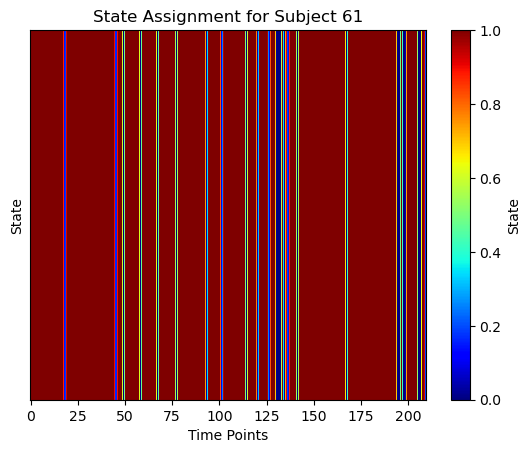

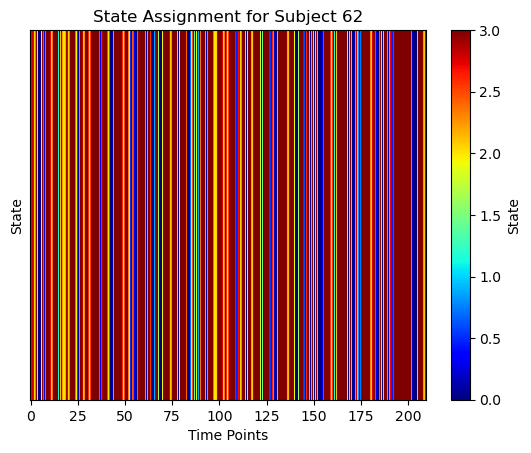

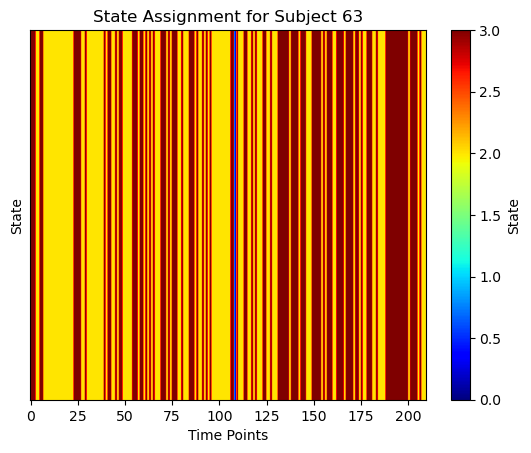

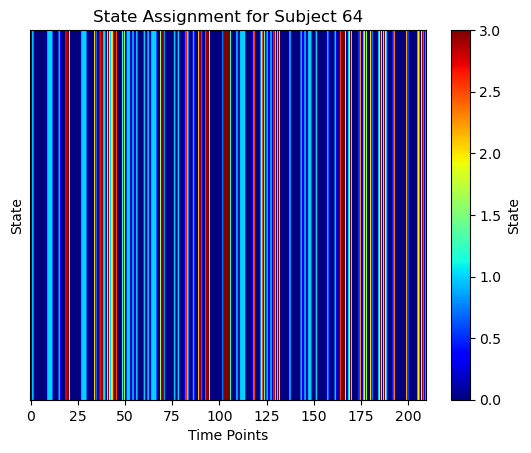

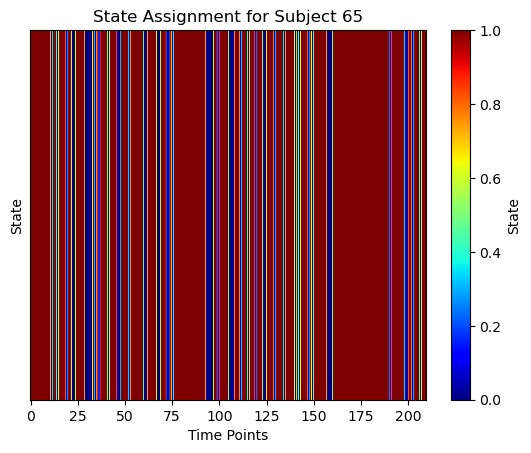

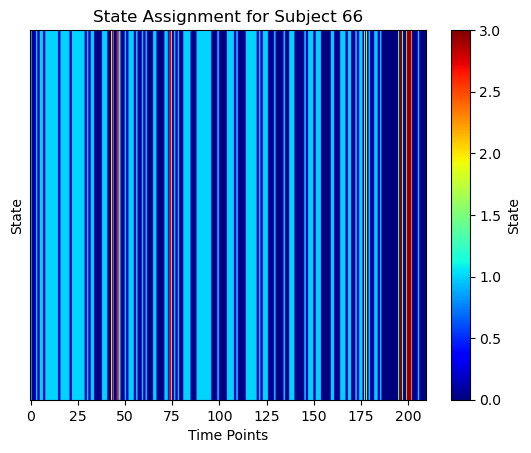

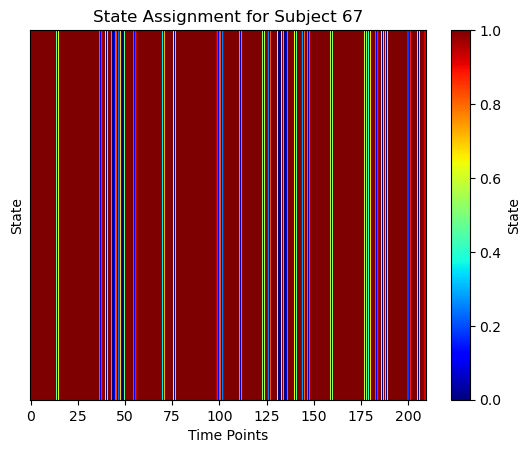

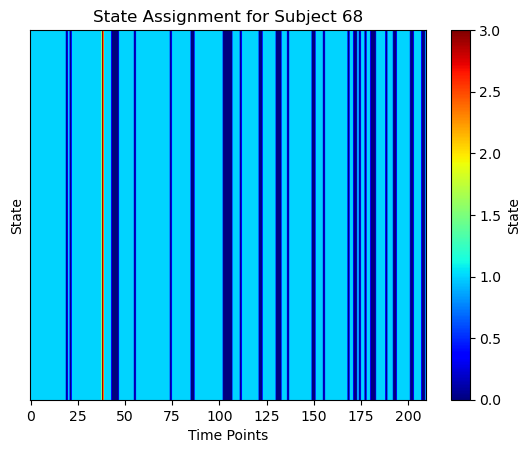

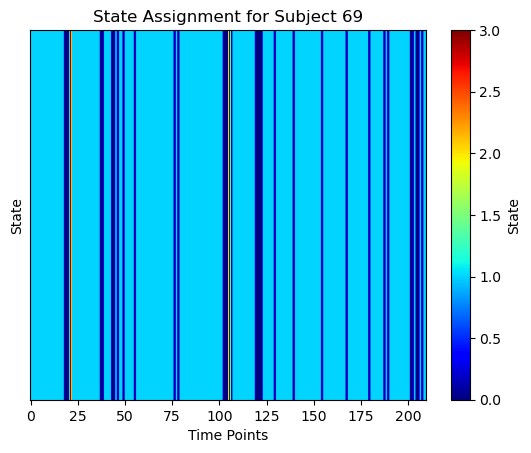

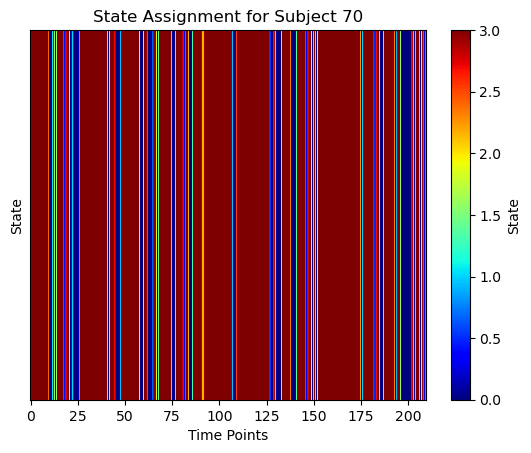

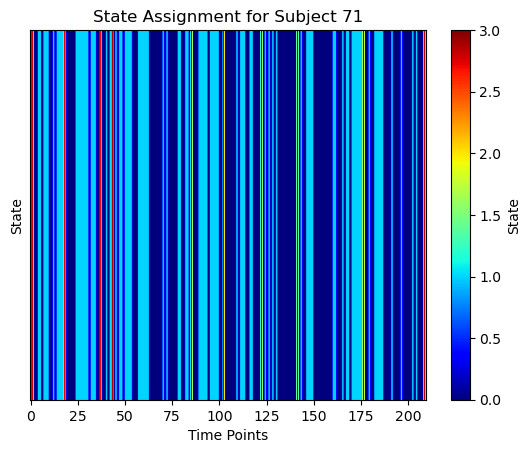

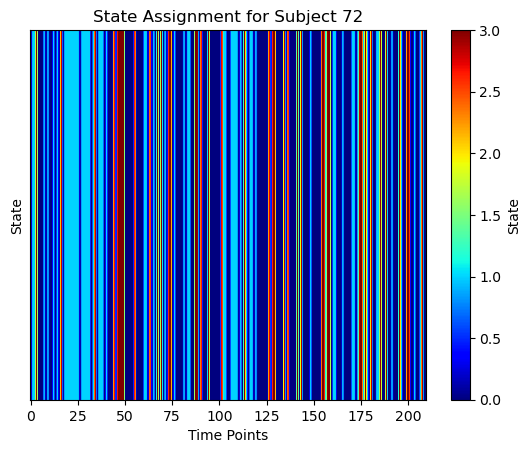

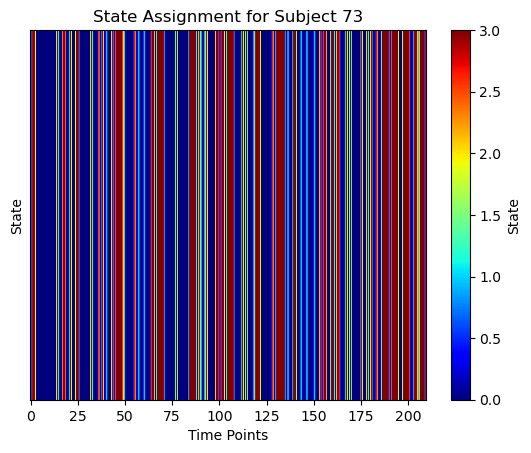

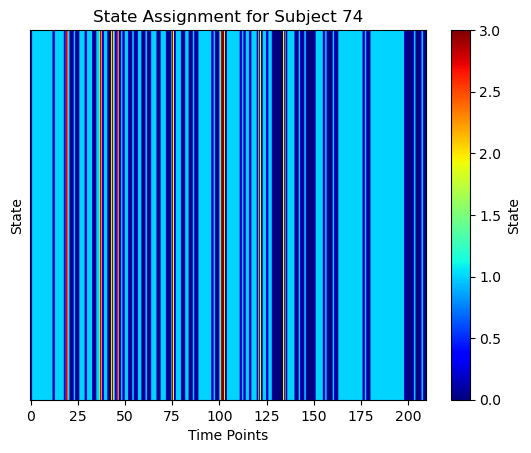

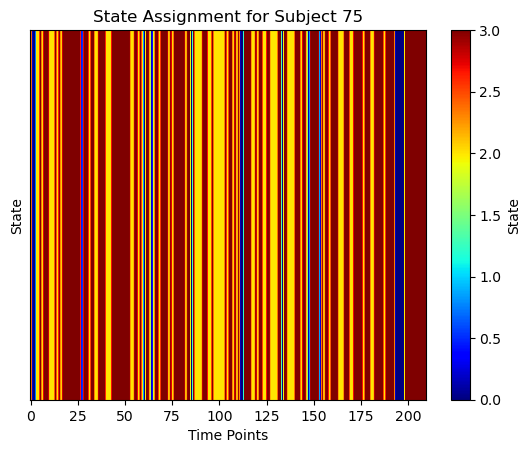

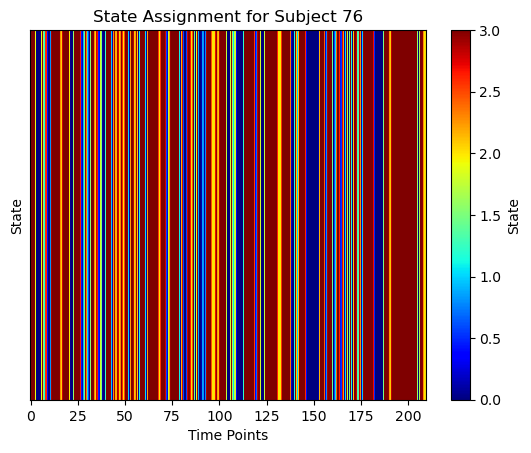

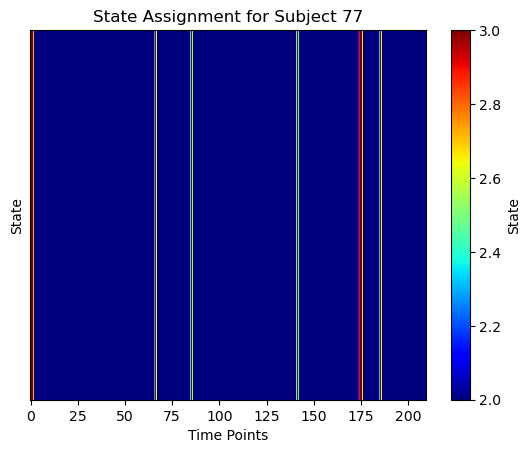

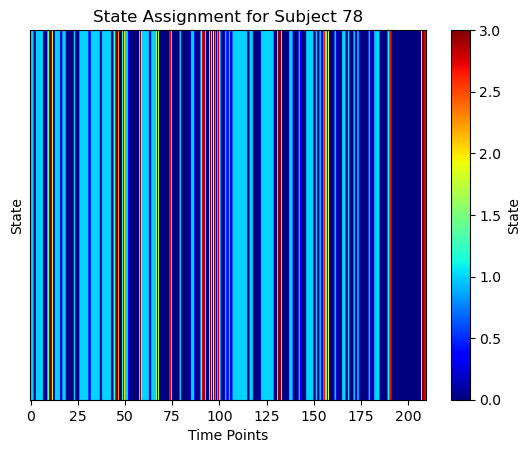

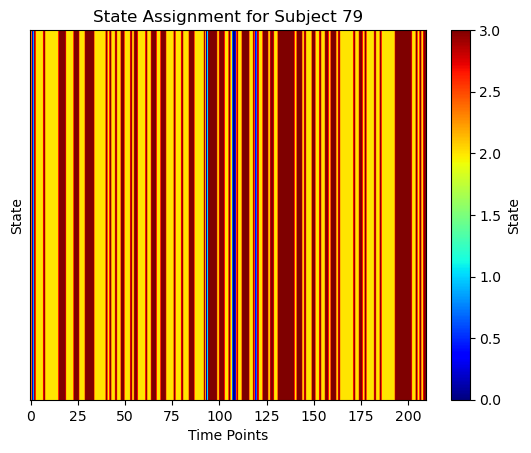

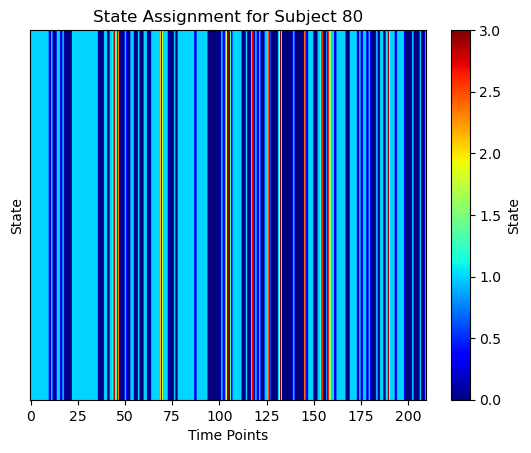

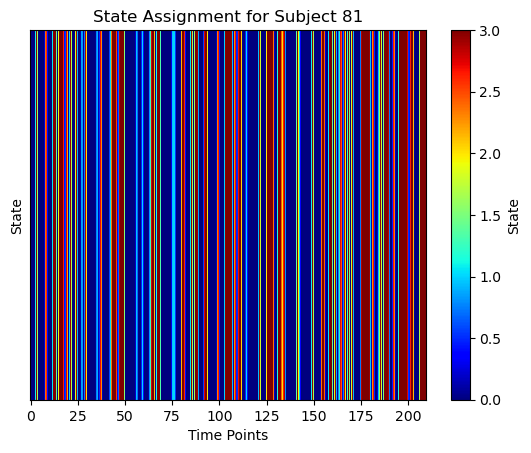

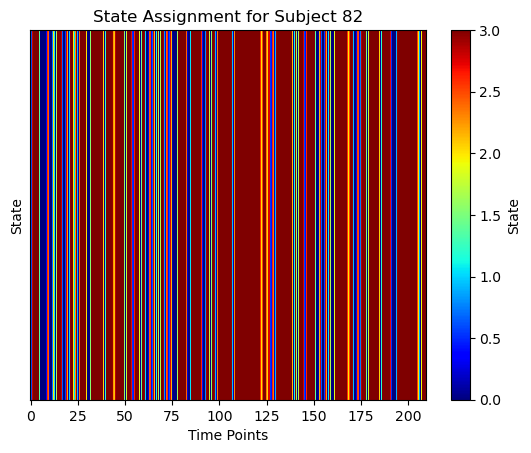

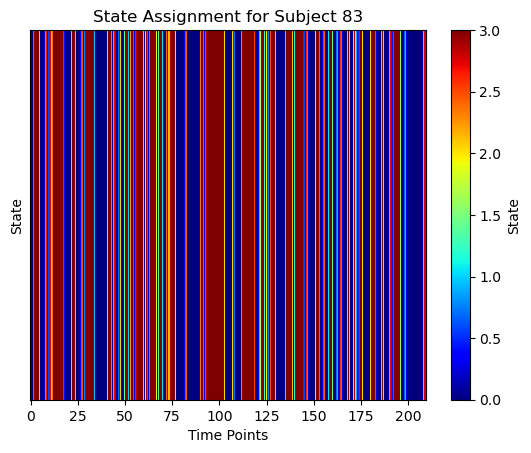

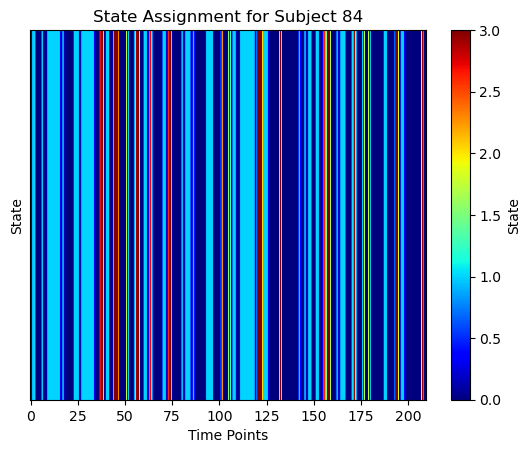

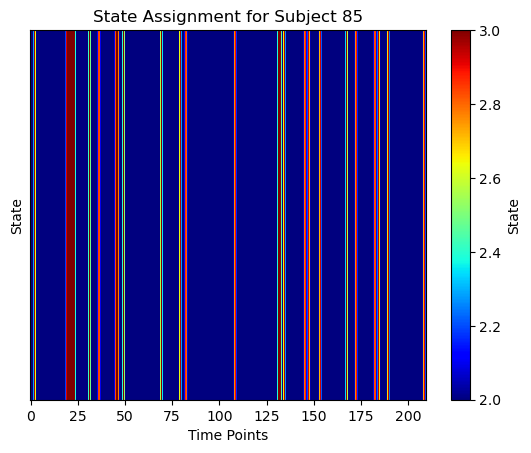

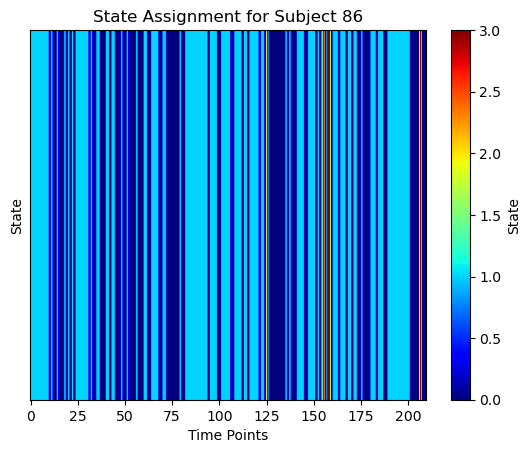

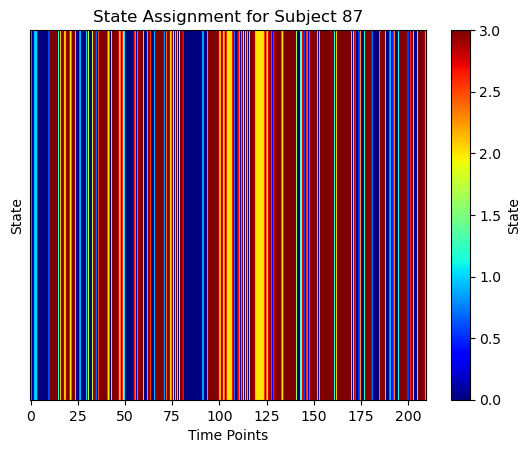

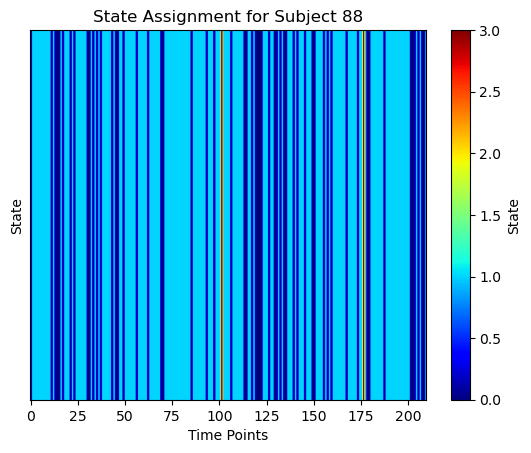

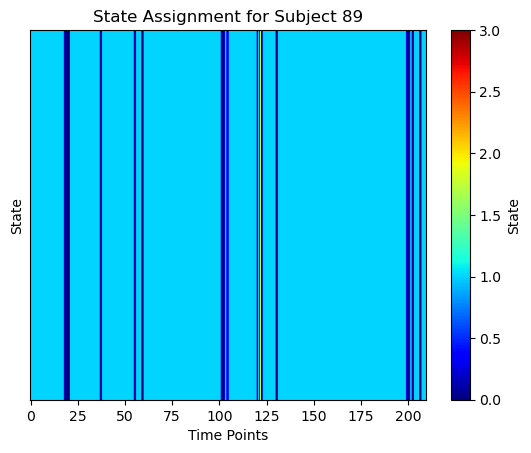

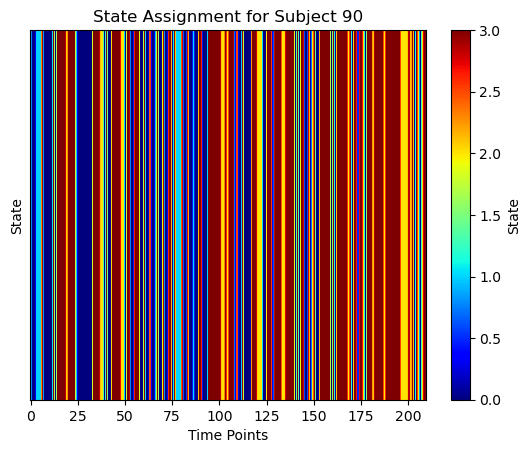

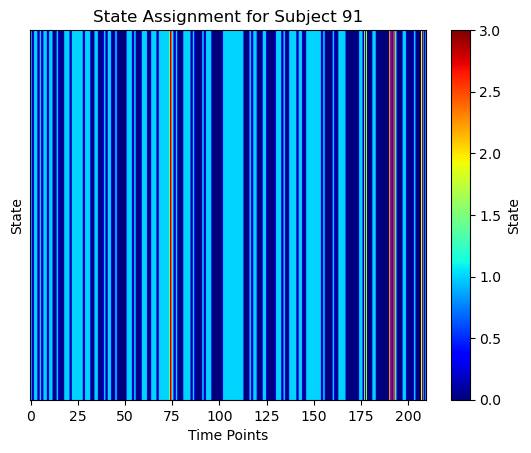

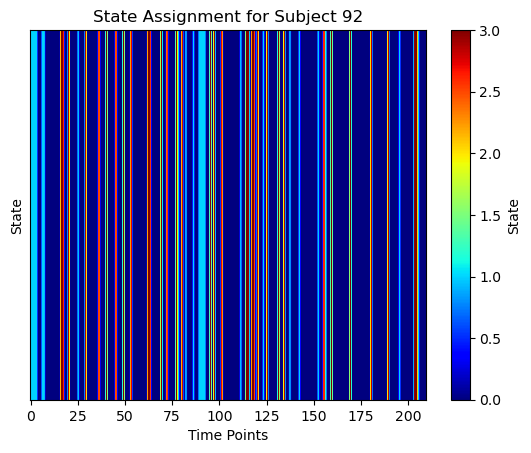

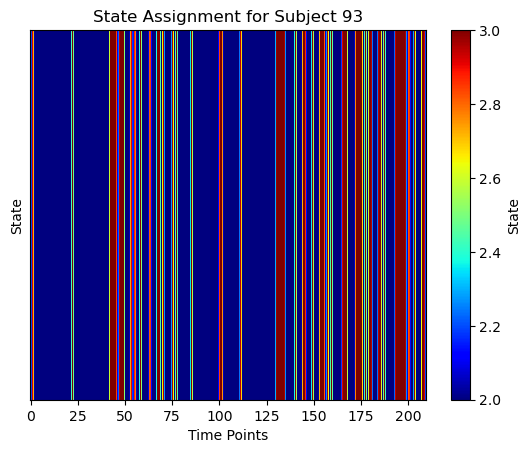

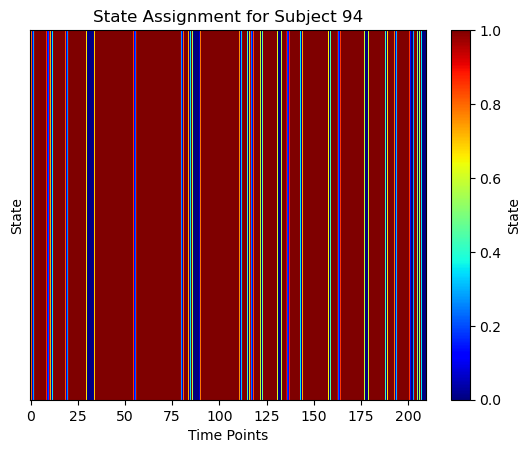

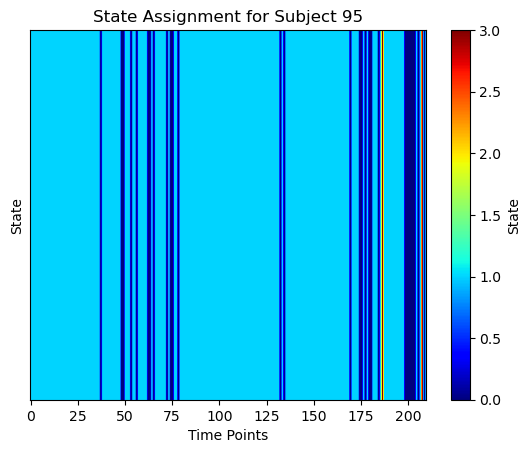

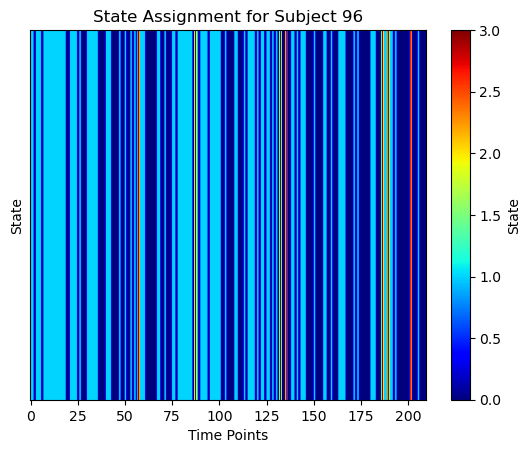

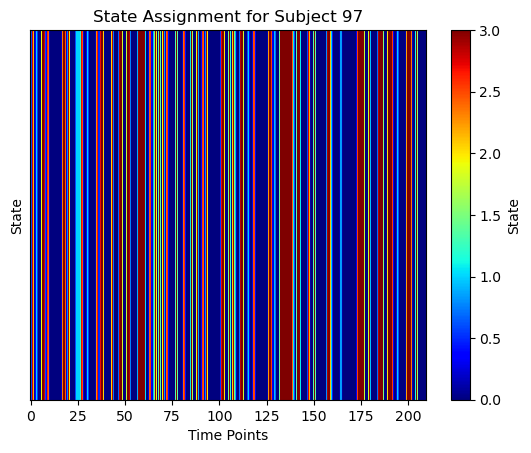

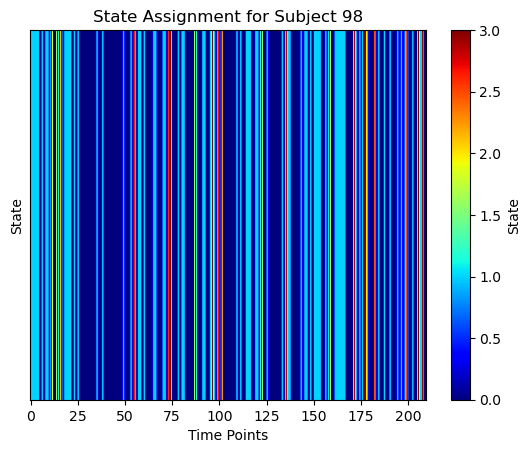

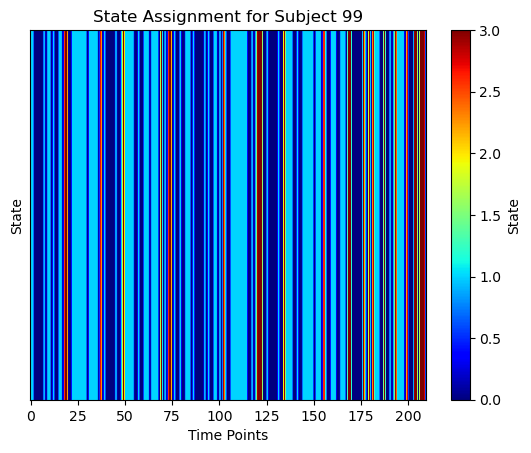

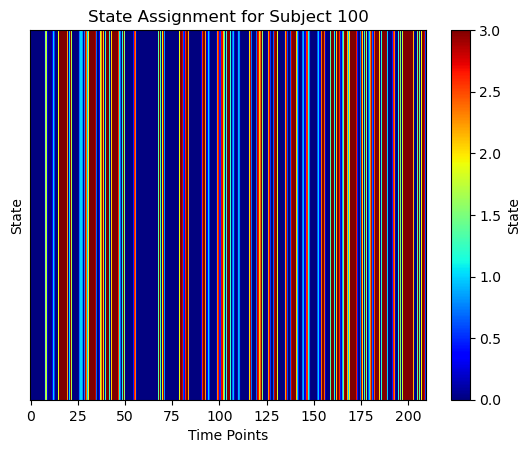

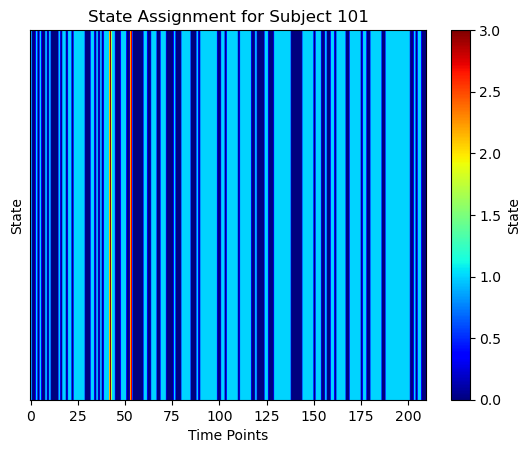

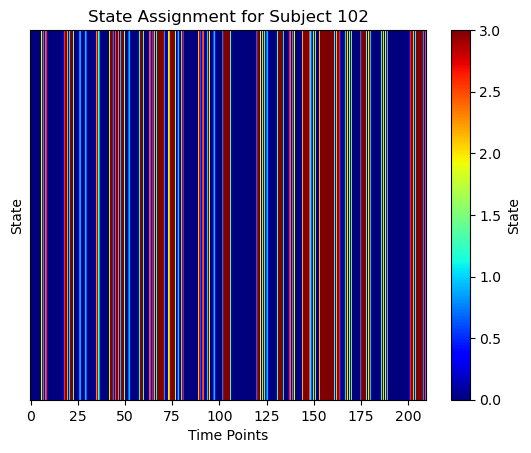

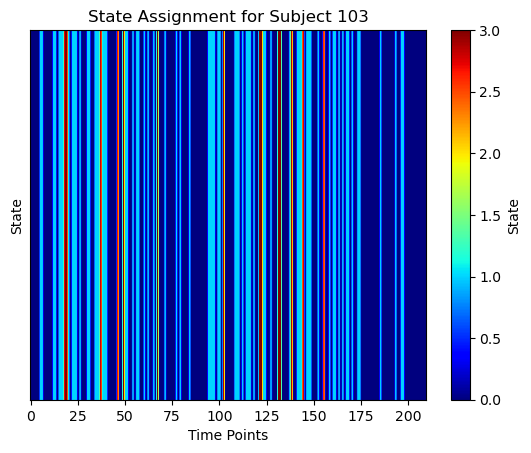

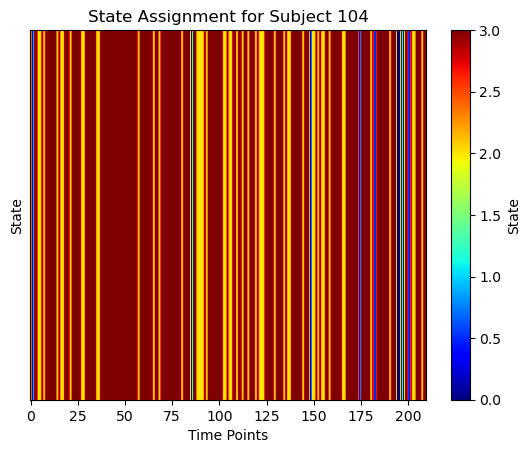

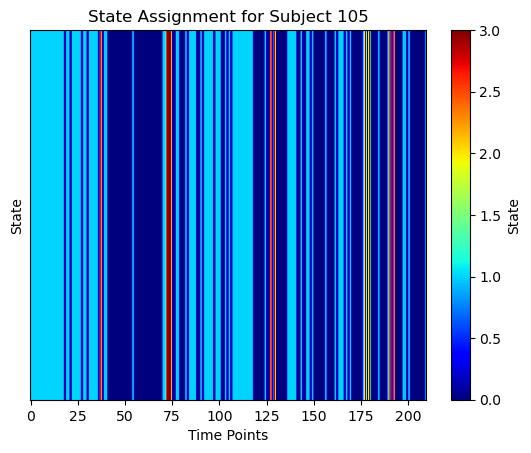

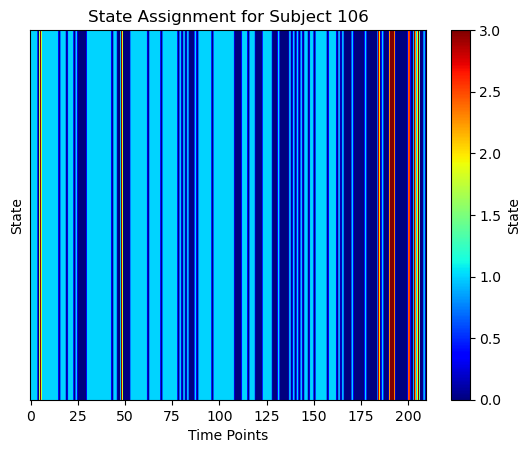

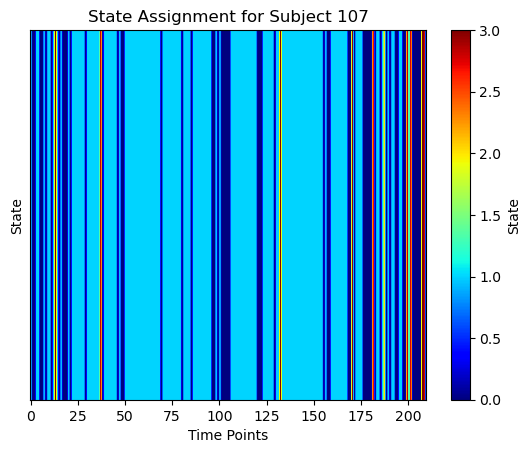

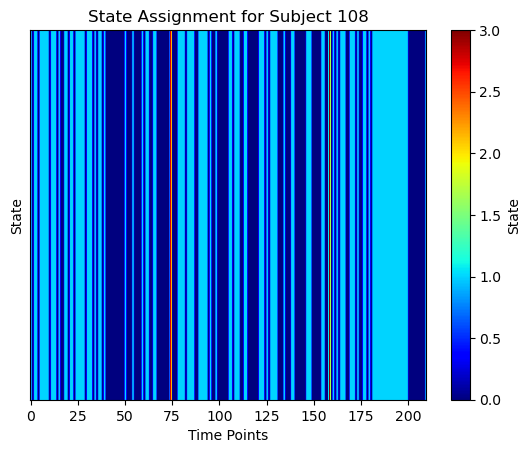

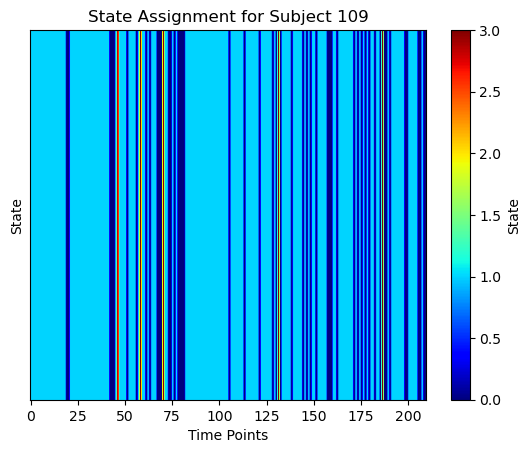

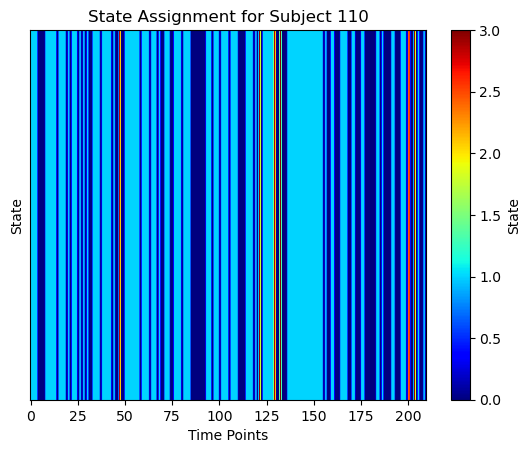

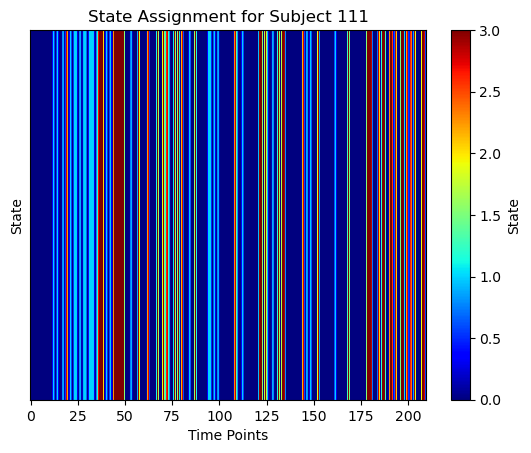

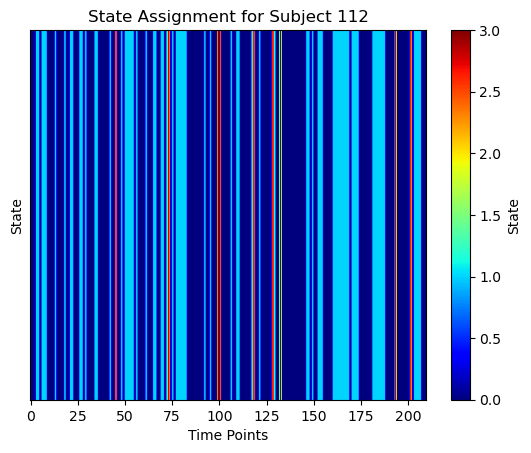

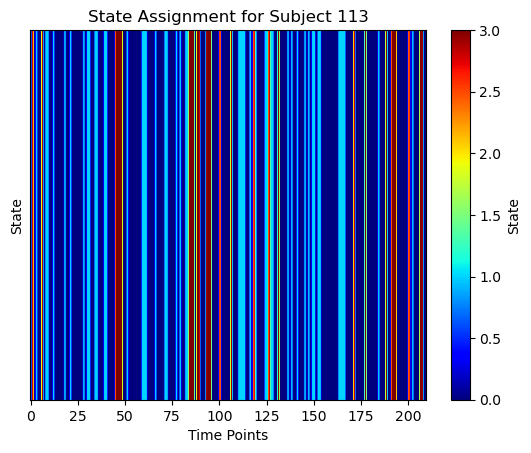

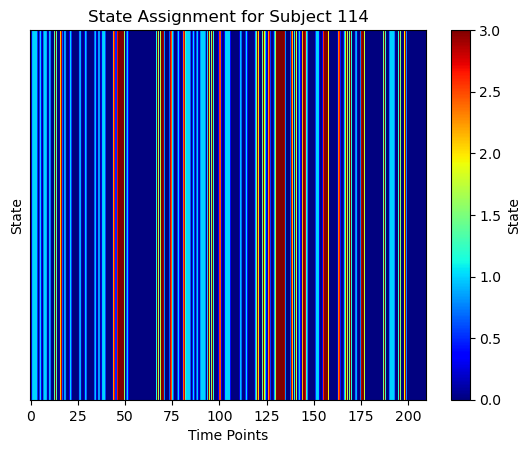

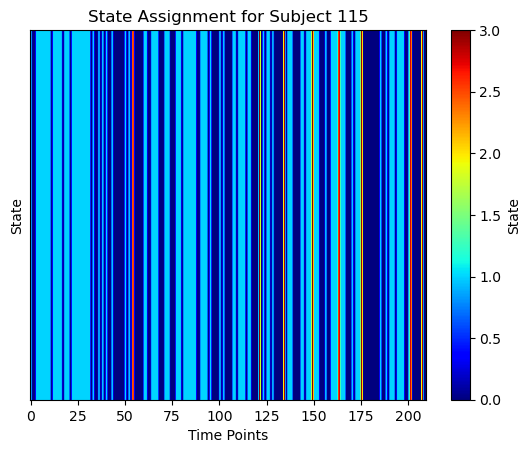

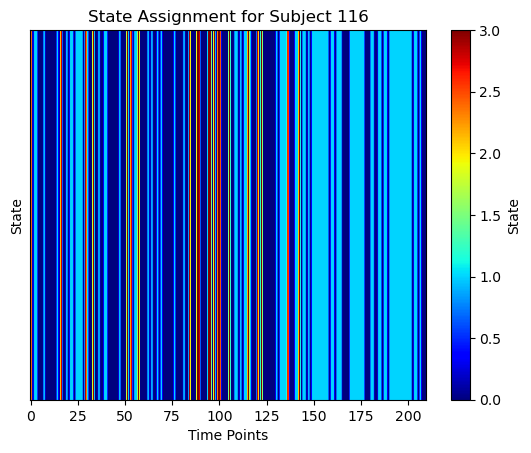

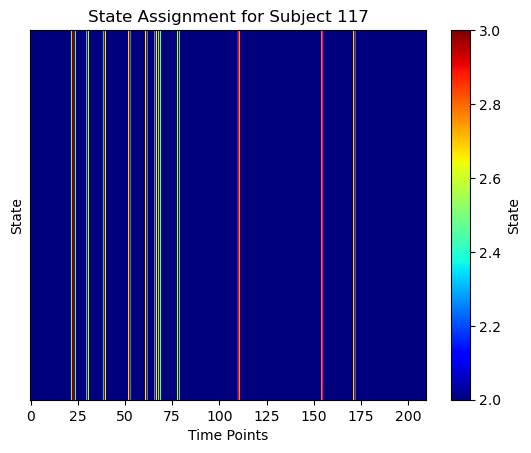

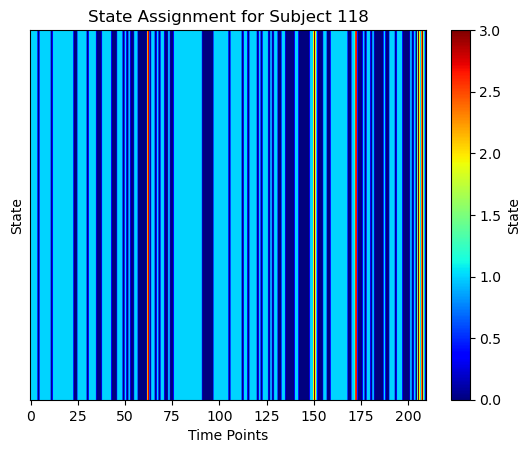

In [24]:
# Optional: Plot individual subjects
for subj in range(119):
    plt.figure()
    plt.imshow(state_assignments[subj, :].reshape(1, -1), aspect='auto', cmap='jet')
    plt.colorbar(label='State')
    plt.title(f'State Assignment for Subject {subj+1}')
    plt.xlabel('Time Points')
    plt.ylabel('State')
    plt.yticks([])
    plt.show()